# Eleições Governador Pernambuco de 2018 

# Preparação dos dados e pacotes necessários para análise

In [1]:
# Importando as bibliotecas
#!pip install -U pandas-profiling
import sys
import os
#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension
import pandas as pd
%matplotlib inline
import pandas as pd
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
import numpy as np
import seaborn as sns
from datetime import datetime, date, time
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('seaborn')
import geopandas as gpd

Imported AutoViz_Class version: 0.0.70. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [2]:
# Carregando o shapefile
dados_mapa = gpd.read_file('/eleicao/shapefile_BR/BRMUE250GC_SIR.shp')

In [3]:
# Verificando o dataframe do geopandas
dados_mapa.head(10)

,NM_MUNICIP,CD_GEOCMU,geometry
0,CAIUÁ,3509106,"POLYGON ((-51.86001 -21.58072, -51.85892 -21.5..."
1,CASTILHO,3511003,"POLYGON ((-51.41936 -20.68108, -51.41942 -20.6..."
2,DRACENA,3514403,"POLYGON ((-51.48515 -21.42765, -51.48500 -21.4..."
3,ESTRELA DO NORTE,3515301,"POLYGON ((-51.57097 -22.39887, -51.57099 -22.3..."
4,EUCLIDES DA CUNHA PAULISTA,3515350,"POLYGON ((-52.44569 -22.60828, -52.44569 -22.6..."
5,MARABÁ PAULISTA,3528700,"POLYGON ((-51.91536 -22.00663, -51.91444 -22.0..."
6,MIRANTE DO PARANAPANEMA,3530201,"POLYGON ((-51.73845 -22.17988, -51.73878 -22.1..."
7,MONTE CASTELO,3531605,"POLYGON ((-51.50184 -21.22107, -51.50192 -21.2..."
8,NARANDIBA,3532207,"POLYGON ((-51.49267 -22.36201, -51.49287 -22.3..."
9,NOVA GUATAPORANGA,3533106,"POLYGON ((-51.61607 -21.32703, -51.61675 -21.3..."


In [4]:
type(dados_mapa)

geopandas.geodataframe.GeoDataFrame

In [5]:
# Verificando tamanho e colunas
dados_mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NM_MUNICIP  5572 non-null   object  
 1   CD_GEOCMU   5572 non-null   object  
 2   geometry    5572 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 130.7+ KB


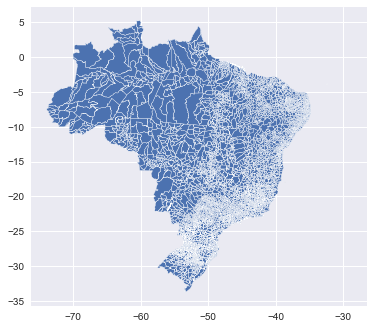

In [6]:
# Exibir o mapa (plotar o shapefile)
dados_mapa.plot();

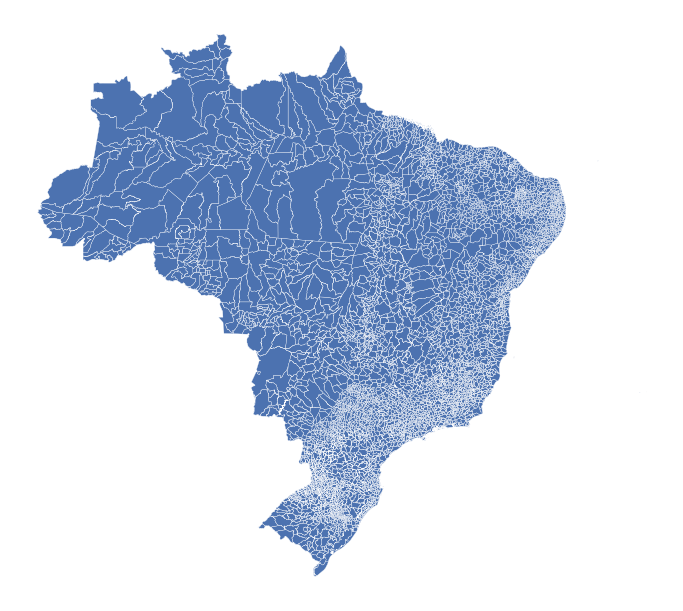

In [7]:
# Plotar o mapa

# Expandir o espaço para desenhar o mapa
fig, ax = plt.subplots(1, figsize=(12,12))

# desenhar o mapa
dados_mapa.plot(ax=ax)

# tirar os eixos
ax.set_axis_off()

plt.show()

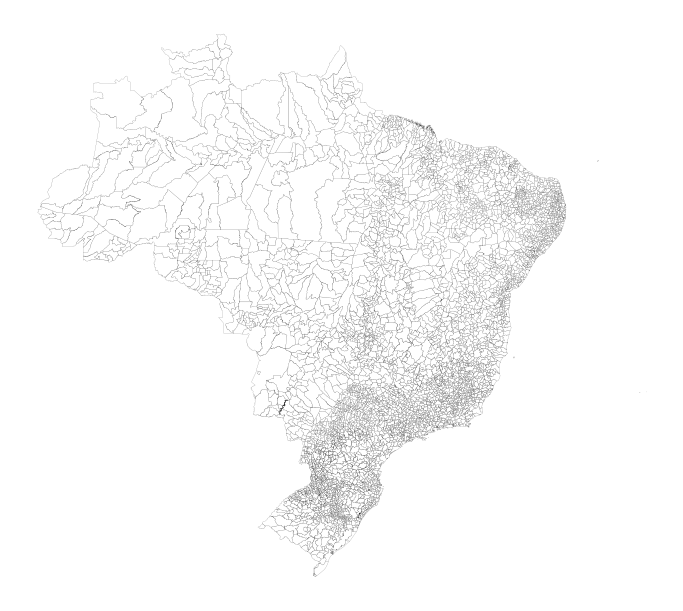

In [8]:
# Plotando o mapa 
fig, ax = plt.subplots(figsize=(12, 12))
dados_mapa.plot(ax=ax, color='white', edgecolor='black', linewidth=0.1)
ax.set_axis_off()
plt.show()

In [9]:
# Carrega o arquivo com o resultado da eleição no Brasil dividido por municipio/zona

# Carregando a massa de dados de votação

# Carrega o arquivo com o resultado da eleição de Pernambuco

dados_votacao_br = pd.read_csv('/eleicao/votacao/votacao_candidato_munzona_2018_BR.csv', sep=';', encoding='latin1')
dados_votacao_pe = pd.read_csv('/eleicao/votacao/votacao_candidato_munzona_2018_PE.csv', sep=';', encoding='latin1')





In [10]:
# Visualizando o dataframe transposto
dados_votacao_br.head().T

,0,1,2,3,4
DT_GERACAO,27/09/2020,27/09/2020,27/09/2020,27/09/2020,27/09/2020
HH_GERACAO,19:20:08,19:20:08,19:20:08,19:20:08,19:20:08
ANO_ELEICAO,2018,2018,2018,2018,2018
CD_TIPO_ELEICAO,2,2,2,2,2
NM_TIPO_ELEICAO,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária
NR_TURNO,1,1,1,1,1
CD_ELEICAO,295,295,295,295,295
DS_ELEICAO,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018
DT_ELEICAO,07/10/2018,07/10/2018,07/10/2018,07/10/2018,07/10/2018
TP_ABRANGENCIA,F,F,F,F,F


In [11]:
# Visualizando o dataframe transposto
dados_votacao_pe.head().T

,0,1,2,3,4
DT_GERACAO,27/09/2020,27/09/2020,27/09/2020,27/09/2020,27/09/2020
HH_GERACAO,19:13:51,19:13:51,19:13:51,19:13:51,19:13:51
ANO_ELEICAO,2018,2018,2018,2018,2018
CD_TIPO_ELEICAO,2,2,2,2,2
NM_TIPO_ELEICAO,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária
NR_TURNO,1,1,1,1,1
CD_ELEICAO,297,297,297,297,297
DS_ELEICAO,ELEIÇÕES GERAIS ESTADUAIS 2018,ELEIÇÕES GERAIS ESTADUAIS 2018,ELEIÇÕES GERAIS ESTADUAIS 2018,ELEIÇÕES GERAIS ESTADUAIS 2018,ELEIÇÕES GERAIS ESTADUAIS 2018
DT_ELEICAO,07/10/2018,07/10/2018,07/10/2018,07/10/2018,07/10/2018
TP_ABRANGENCIA,E,E,E,E,E


# O pandas profiling é uma ferramenta que gera um relatório html com informações estatísticas e as principais características do seu dataframe em apenas uma linha de código

In [12]:
#import pandas_profiling

In [13]:
# Relatorio visual das colunas do dataframe
#pandas_profiling.ProfileReport(dados_votacao_br,  title = "Relatório de criação de perfil do Pandas")

In [14]:
#profile =pandas_profiling.ProfileReport(dados_votacao_br)

In [15]:
#profile.to_file("BRreport.html")

# Sweetviz é uma biblioteca python que se concentra em explorar os dados com a ajuda de belas visualizações de alta densidade. Ele não apenas automatiza o EDA, mas também é usado para comparar conjuntos de dados e fazer inferências a partir deles.

In [16]:
#my_report = sv.analyze(dados_votacao_br) # cria o reporte e chama de my_report
#my_report.show_html()

# sv.anlyze(dados).show_html()

# Autoviz é uma biblioteca python de código aberto que trabalha principalmente na visualização da relação dos dados, pode encontrar os recursos mais impactantes e traçar a visualização criativa em apenas uma linha de código. Autoviz é incrivelmente rápido e altamente útil.

In [17]:
#dados_votacao = AV.AutoViz ('/eleicao/votacao/votacao_candidato_munzona_2018_BR.csv', sep=';')

In [18]:
# Informação das coluna e uso de memoria
dados_votacao_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94095 entries, 0 to 94094
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DT_GERACAO                94095 non-null  object
 1   HH_GERACAO                94095 non-null  object
 2   ANO_ELEICAO               94095 non-null  int64 
 3   CD_TIPO_ELEICAO           94095 non-null  int64 
 4   NM_TIPO_ELEICAO           94095 non-null  object
 5   NR_TURNO                  94095 non-null  int64 
 6   CD_ELEICAO                94095 non-null  int64 
 7   DS_ELEICAO                94095 non-null  object
 8   DT_ELEICAO                94095 non-null  object
 9   TP_ABRANGENCIA            94095 non-null  object
 10  SG_UF                     94095 non-null  object
 11  SG_UE                     94095 non-null  object
 12  NM_UE                     94095 non-null  object
 13  CD_MUNICIPIO              94095 non-null  int64 
 14  NM_MUNICIPIO          

In [19]:
# Quantidade de linhas e colunas
dados_votacao_br.shape

(94095, 38)

In [20]:
# Retorna o nome da colunas do dataframe
dados_votacao_br.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'CD_SITUACAO_CANDIDATURA',
       'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND',
       'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'ST_VOTO_EM_TRANSITO',
       'QT_VOTOS_NOMINAIS'],
      dtype='object')

In [21]:
# Verificando os tipos de dadoa
dados_votacao_br.dtypes

DT_GERACAO                  object
HH_GERACAO                  object
ANO_ELEICAO                  int64
CD_TIPO_ELEICAO              int64
NM_TIPO_ELEICAO             object
NR_TURNO                     int64
CD_ELEICAO                   int64
DS_ELEICAO                  object
DT_ELEICAO                  object
TP_ABRANGENCIA              object
SG_UF                       object
SG_UE                       object
NM_UE                       object
CD_MUNICIPIO                 int64
NM_MUNICIPIO                object
NR_ZONA                      int64
CD_CARGO                     int64
DS_CARGO                    object
SQ_CANDIDATO                 int64
NR_CANDIDATO                 int64
NM_CANDIDATO                object
NM_URNA_CANDIDATO           object
NM_SOCIAL_CANDIDATO         object
CD_SITUACAO_CANDIDATURA      int64
DS_SITUACAO_CANDIDATURA     object
CD_DETALHE_SITUACAO_CAND     int64
DS_DETALHE_SITUACAO_CAND    object
TP_AGREMIACAO               object
NR_PARTIDO          

In [22]:
# Numero de celulas
dados_votacao_br.size

3575610

In [23]:
# Esse índice começa em 0 e vai sendo incrementado de 1 em 1 até a última
dados_votacao_br.index

RangeIndex(start=0, stop=94095, step=1)

In [24]:
# transforma as colunas em lista
dados_votacao_br.columns.tolist()

['DT_GERACAO',
 'HH_GERACAO',
 'ANO_ELEICAO',
 'CD_TIPO_ELEICAO',
 'NM_TIPO_ELEICAO',
 'NR_TURNO',
 'CD_ELEICAO',
 'DS_ELEICAO',
 'DT_ELEICAO',
 'TP_ABRANGENCIA',
 'SG_UF',
 'SG_UE',
 'NM_UE',
 'CD_MUNICIPIO',
 'NM_MUNICIPIO',
 'NR_ZONA',
 'CD_CARGO',
 'DS_CARGO',
 'SQ_CANDIDATO',
 'NR_CANDIDATO',
 'NM_CANDIDATO',
 'NM_URNA_CANDIDATO',
 'NM_SOCIAL_CANDIDATO',
 'CD_SITUACAO_CANDIDATURA',
 'DS_SITUACAO_CANDIDATURA',
 'CD_DETALHE_SITUACAO_CAND',
 'DS_DETALHE_SITUACAO_CAND',
 'TP_AGREMIACAO',
 'NR_PARTIDO',
 'SG_PARTIDO',
 'NM_PARTIDO',
 'SQ_COLIGACAO',
 'NM_COLIGACAO',
 'DS_COMPOSICAO_COLIGACAO',
 'CD_SIT_TOT_TURNO',
 'DS_SIT_TOT_TURNO',
 'ST_VOTO_EM_TRANSITO',
 'QT_VOTOS_NOMINAIS']

In [25]:
# retorna a quantidade de linha de todas as colunas
dados_votacao_br.count()

DT_GERACAO                  94095
HH_GERACAO                  94095
ANO_ELEICAO                 94095
CD_TIPO_ELEICAO             94095
NM_TIPO_ELEICAO             94095
NR_TURNO                    94095
CD_ELEICAO                  94095
DS_ELEICAO                  94095
DT_ELEICAO                  94095
TP_ABRANGENCIA              94095
SG_UF                       94095
SG_UE                       94095
NM_UE                       94095
CD_MUNICIPIO                94095
NM_MUNICIPIO                94095
NR_ZONA                     94095
CD_CARGO                    94095
DS_CARGO                    94095
SQ_CANDIDATO                94095
NR_CANDIDATO                94095
NM_CANDIDATO                94095
NM_URNA_CANDIDATO           94095
NM_SOCIAL_CANDIDATO         94095
CD_SITUACAO_CANDIDATURA     94095
DS_SITUACAO_CANDIDATURA     94095
CD_DETALHE_SITUACAO_CAND    94095
DS_DETALHE_SITUACAO_CAND    94095
TP_AGREMIACAO               94095
NR_PARTIDO                  94095
SG_PARTIDO    

In [26]:
# Informações estatistica da base de dados.
dados_votacao_br.describe().round(2)

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,CD_MUNICIPIO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
count,94095.0,94095.0,94095.00,94095.00,94095.00,94095.00,94095.0,9.409500e+04,94095.00,94095.0,94095.0,94095.00,9.409500e+04,94095.00,94095.00
mean,2018.0,2.0,1.13,295.13,51414.65,91.72,1.0,2.800006e+11,26.47,12.0,2.0,26.47,2.800001e+11,4.07,2251.87
std,0.0,0.0,0.34,0.34,28978.01,86.64,0.0,1.020276e+04,15.03,0.0,0.0,15.03,2.511400e+02,1.06,6979.46
min,2018.0,2.0,1.00,295.00,19.00,1.00,1.0,2.800006e+11,12.00,12.0,2.0,12.00,2.800001e+11,1.00,0.00
25%,2018.0,2.0,1.00,295.00,25755.00,27.00,1.0,2.800006e+11,15.00,12.0,2.0,15.00,2.800001e+11,4.00,10.00
50%,2018.0,2.0,1.00,295.00,51535.00,65.00,1.0,2.800006e+11,18.00,12.0,2.0,18.00,2.800001e+11,4.00,94.00
75%,2018.0,2.0,1.00,295.00,77771.00,131.00,1.0,2.800006e+11,45.00,12.0,2.0,45.00,2.800001e+11,4.00,1153.00
max,2018.0,2.0,2.00,296.00,99430.00,427.00,1.0,2.800006e+11,54.00,12.0,2.0,54.00,2.800001e+11,6.00,113283.00


In [27]:
# Variáveis categóricas:
dados_votacao_br.describe(include=['O'])

,DT_GERACAO,HH_GERACAO,NM_TIPO_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,NM_MUNICIPIO,...,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO
count,94095,94095,94095,94095,94095,94095,94095,94095,94095,94095,...,94095,94095,94095,94095,94095,94095,94095,94095,94095,94095
unique,1,1,1,1,2,1,28,1,1,5456,...,1,1,1,2,13,13,9,13,3,1
top,27/09/2020,19:20:08,Eleição Ordinária,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,MG,BR,BRASIL,SÃO PAULO,...,#NULO#,APTO,DEFERIDO,Coligação,PSL,Partido dos Trabalhadores,PARTIDO ISOLADO,PT / PC do B / PROS,NÃO ELEITO,N
freq,94095,94095,94095,94095,81549,94095,13470,94095,94095,870,...,94095,94095,94095,62730,12546,12546,31365,12546,75276,94095


In [28]:
#Matriz de correlação - person
dados_votacao_br.corr().round(4)

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,CD_MUNICIPIO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
ANO_ELEICAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_TIPO_ELEICAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NR_TURNO,NaN,NaN,1.0000,1.0000,-0.0000,-0.0000,NaN,0.2878,-0.2992,NaN,NaN,-0.2992,0.2577,-0.5784,0.3431
CD_ELEICAO,NaN,NaN,1.0000,1.0000,-0.0000,-0.0000,NaN,0.2878,-0.2992,NaN,NaN,-0.2992,0.2577,-0.5784,0.3431
CD_MUNICIPIO,NaN,NaN,-0.0000,-0.0000,1.0000,0.1442,NaN,-0.0000,-0.0000,NaN,NaN,-0.0000,0.0000,0.0000,0.0080
NR_ZONA,NaN,NaN,-0.0000,-0.0000,0.1442,1.0000,NaN,0.0000,-0.0000,NaN,NaN,-0.0000,0.0000,0.0000,0.0879
CD_CARGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SQ_CANDIDATO,NaN,NaN,0.2878,0.2878,-0.0000,0.0000,NaN,1.0000,-0.3989,NaN,NaN,-0.3989,0.9957,0.1871,0.1437
NR_CANDIDATO,NaN,NaN,-0.2992,-0.2992,-0.0000,-0.0000,NaN,-0.3989,1.0000,NaN,NaN,1.0000,-0.3861,-0.0729,-0.2168
CD_SITUACAO_CANDIDATURA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Correlação de spearman - leva em consideração  a correlação positiva e negativa
dados_votacao_br.corr('spearman').round(4)

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,CD_MUNICIPIO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
ANO_ELEICAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD_TIPO_ELEICAO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NR_TURNO,NaN,NaN,1.0000,1.0000,0.0000,0.0000,NaN,0.2728,-0.3183,NaN,NaN,-0.3183,0.2728,-0.4876,0.4576
CD_ELEICAO,NaN,NaN,1.0000,1.0000,0.0000,0.0000,NaN,0.2728,-0.3183,NaN,NaN,-0.3183,0.2728,-0.4876,0.4576
CD_MUNICIPIO,NaN,NaN,0.0000,0.0000,1.0000,0.1441,NaN,0.0000,0.0000,NaN,NaN,0.0000,0.0000,0.0000,0.0180
NR_ZONA,NaN,NaN,0.0000,0.0000,0.1441,1.0000,NaN,0.0000,0.0000,NaN,NaN,0.0000,0.0000,0.0000,0.0766
CD_CARGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SQ_CANDIDATO,NaN,NaN,0.2728,0.2728,0.0000,0.0000,NaN,1.0000,-0.3190,NaN,NaN,-0.3190,1.0000,0.2319,0.1458
NR_CANDIDATO,NaN,NaN,-0.3183,-0.3183,0.0000,0.0000,NaN,-0.3190,1.0000,NaN,NaN,1.0000,-0.3190,-0.2011,-0.4873
CD_SITUACAO_CANDIDATURA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# é ou não é missing?
dados_votacao_br.isna()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94090,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94091,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94092,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94093,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# contagem de missing por coluna.
dados_votacao_br.isna().sum()

DT_GERACAO                  0
HH_GERACAO                  0
ANO_ELEICAO                 0
CD_TIPO_ELEICAO             0
NM_TIPO_ELEICAO             0
NR_TURNO                    0
CD_ELEICAO                  0
DS_ELEICAO                  0
DT_ELEICAO                  0
TP_ABRANGENCIA              0
SG_UF                       0
SG_UE                       0
NM_UE                       0
CD_MUNICIPIO                0
NM_MUNICIPIO                0
NR_ZONA                     0
CD_CARGO                    0
DS_CARGO                    0
SQ_CANDIDATO                0
NR_CANDIDATO                0
NM_CANDIDATO                0
NM_URNA_CANDIDATO           0
NM_SOCIAL_CANDIDATO         0
CD_SITUACAO_CANDIDATURA     0
DS_SITUACAO_CANDIDATURA     0
CD_DETALHE_SITUACAO_CAND    0
DS_DETALHE_SITUACAO_CAND    0
TP_AGREMIACAO               0
NR_PARTIDO                  0
SG_PARTIDO                  0
NM_PARTIDO                  0
SQ_COLIGACAO                0
NM_COLIGACAO                0
DS_COMPOSI

In [32]:
# Vamos verificar quantos municipios unicos existem no conjunto de dados
# Vamos pegar por codigo do municipio
dados_votacao_br['CD_MUNICIPIO'].nunique()

5741

In [33]:
# Mas o Brasil tem 5570 municipios
# Vamos verificar algumas cidades fora do Brasil
dados_votacao_br[dados_votacao_br['SG_UF'] == 'ZZ'].sample(4).T

,84606,22661,31603,65816
DT_GERACAO,27/09/2020,27/09/2020,27/09/2020,27/09/2020
HH_GERACAO,19:20:08,19:20:08,19:20:08,19:20:08
ANO_ELEICAO,2018,2018,2018,2018
CD_TIPO_ELEICAO,2,2,2,2
NM_TIPO_ELEICAO,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária
NR_TURNO,1,1,1,1
CD_ELEICAO,295,295,295,295
DS_ELEICAO,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018
DT_ELEICAO,07/10/2018,07/10/2018,07/10/2018,07/10/2018
TP_ABRANGENCIA,F,F,F,F


In [34]:
# Quantas cidades fora do Brasil estão no conjunto de dados?
dados_votacao_br[dados_votacao_br['SG_UF'] == 'ZZ']['CD_MUNICIPIO'].nunique()

171

In [35]:
# Vamos eliminar os municpios de fora do Brasil
dados_votacao_br = dados_votacao_br[dados_votacao_br['SG_UF'] != 'ZZ']

In [36]:
# Verificando a quantidade de municpios
dados_votacao_br['CD_MUNICIPIO'].nunique()

5570

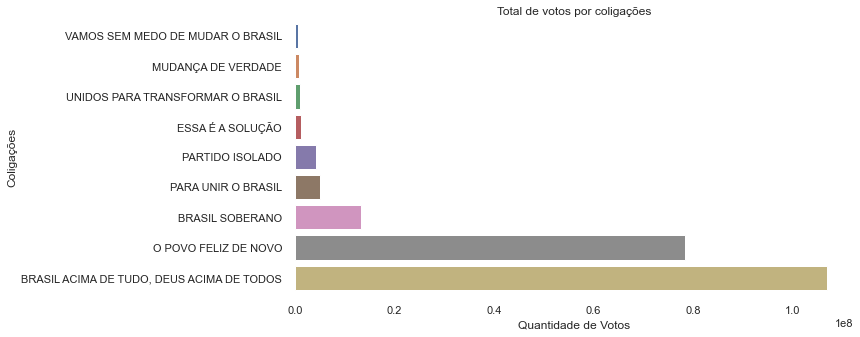

In [37]:
# Votos por coligações

coligacao_voto = dados_votacao_br.pivot_table(values=['QT_VOTOS_NOMINAIS'], 
                                   index=['NM_COLIGACAO'], 
                                   aggfunc='sum').reset_index().sort_values(by="QT_VOTOS_NOMINAIS")

sns.set(style="white")
plt.figure(figsize=(10,5))
graf_colig_voto = sns.barplot(y=coligacao_voto["NM_COLIGACAO"], x=coligacao_voto["QT_VOTOS_NOMINAIS"])

plt.ylabel('Coligações')
plt.xlabel('Quantidade de Votos')
plt.title('Total de votos por coligações')

graf_colig_voto.spines["right"].set_visible(False)
graf_colig_voto.spines["bottom"].set_visible(False)
graf_colig_voto.spines["top"].set_visible(False)
graf_colig_voto.spines["left"].set_visible(False)

plt.show()

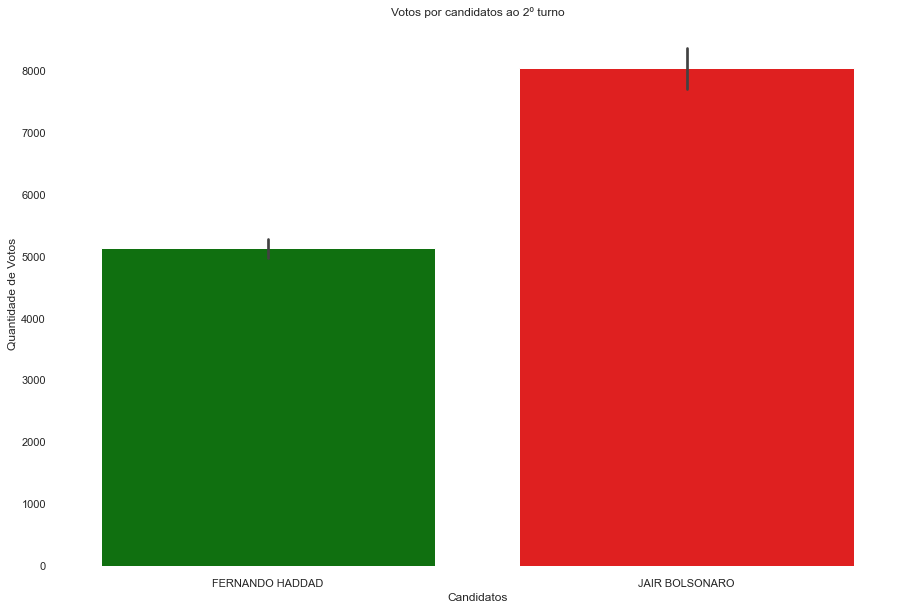

In [38]:
#RESULTADOS BR
candidatos_2_turno = dados_votacao_br[dados_votacao_br["DS_SIT_TOT_TURNO"]=='2º TURNO']

sns.set(style="white")
plt.figure(figsize=(15,10))
graf_voto_candidato = sns.barplot(x=candidatos_2_turno['NM_URNA_CANDIDATO'], y=candidatos_2_turno["QT_VOTOS_NOMINAIS"], palette=['green','red'])
plt.xlabel('Candidatos')
plt.ylabel('Quantidade de Votos')
plt.title('Votos por candidatos ao 2º turno')

graf_voto_candidato.spines["right"].set_visible(False)
graf_voto_candidato.spines["bottom"].set_visible(False)
graf_voto_candidato.spines["top"].set_visible(False)
graf_voto_candidato.spines["left"].set_visible(False)

plt.show()

## Dados de Pernambuco

## Analise Explorátoria

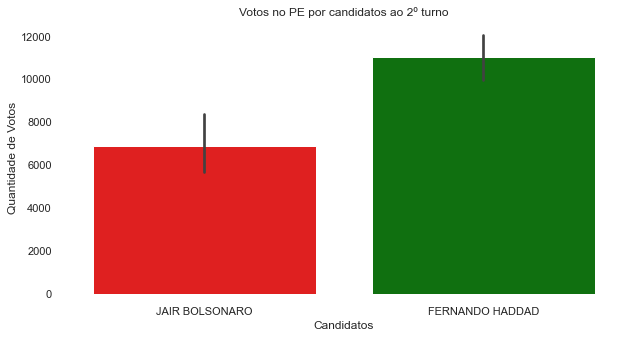

In [39]:
#RESULTADOS PE
candidatos_2_turno_pe = candidatos_2_turno[candidatos_2_turno['SG_UF'] == "PE"]

sns.set(style="white")
plt.figure(figsize=(10,5))
graf_voto_candidato_pe = sns.barplot(x=candidatos_2_turno_pe['NM_URNA_CANDIDATO'], y=candidatos_2_turno_pe["QT_VOTOS_NOMINAIS"], palette=['red','green'])

plt.xlabel('Candidatos')
plt.ylabel('Quantidade de Votos')
plt.title('Votos no PE por candidatos ao 2º turno')

graf_voto_candidato_pe.spines["right"].set_visible(False)
graf_voto_candidato_pe.spines["bottom"].set_visible(False)
graf_voto_candidato_pe.spines["top"].set_visible(False)
graf_voto_candidato_pe.spines["left"].set_visible(False)

plt.show()

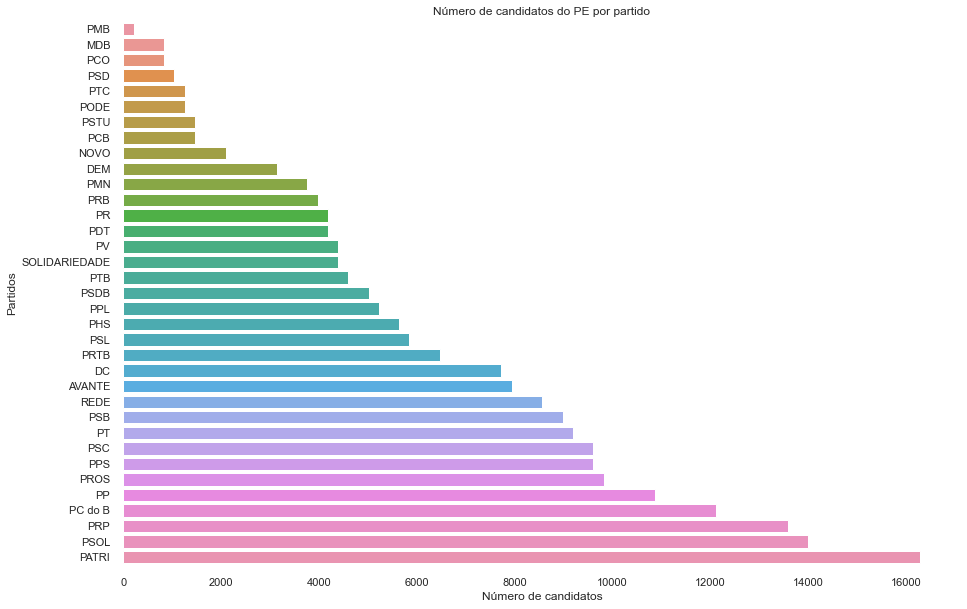

In [40]:
# Número de candidatos do PE por partido
candit_partido = dados_votacao_pe.pivot_table(values=["NM_URNA_CANDIDATO"], index=["SG_PARTIDO"], aggfunc='count').reset_index().sort_values(by="NM_URNA_CANDIDATO")

sns.set(style="white")
plt.figure(figsize=(15,10))
graf_cand_part = sns.barplot(x=candit_partido["NM_URNA_CANDIDATO"], y=candit_partido["SG_PARTIDO"])

plt.xlabel("Número de candidatos")
plt.ylabel("Partidos")
plt.title("Número de candidatos do PE por partido")

graf_cand_part.spines["right"].set_visible(False)
graf_cand_part.spines["bottom"].set_visible(False)
graf_cand_part.spines["top"].set_visible(False)
graf_cand_part.spines["left"].set_visible(False)

plt.show()

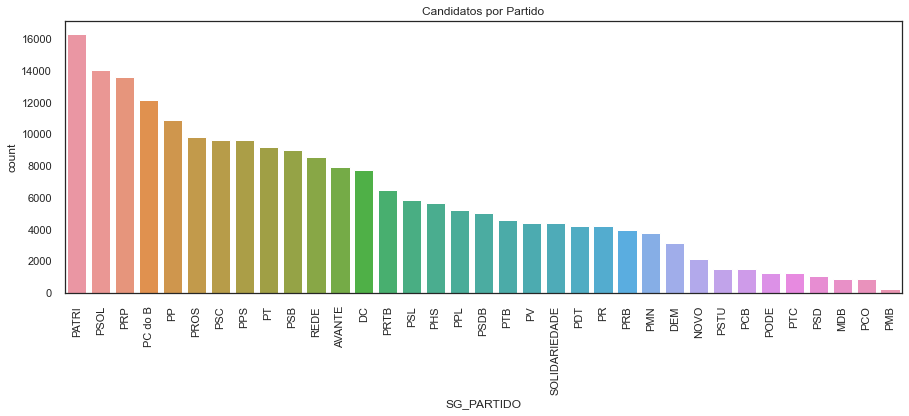

In [41]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.title('Candidatos por Partido')
sns.countplot(data=dados_votacao_pe, x='SG_PARTIDO', order=dados_votacao_pe.SG_PARTIDO.value_counts().index);

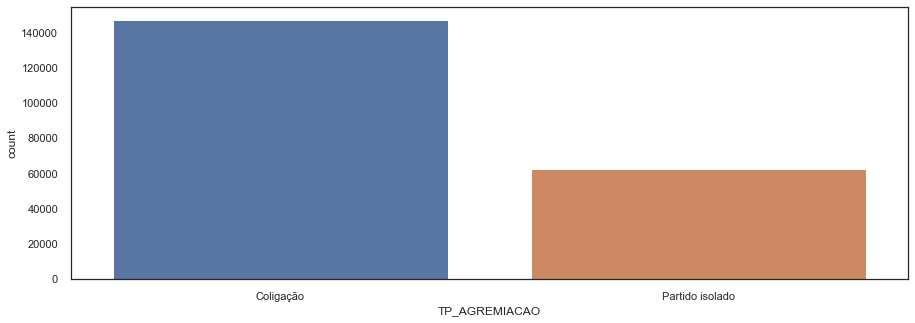

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(data=dados_votacao_pe, x='TP_AGREMIACAO', order=dados_votacao_pe.TP_AGREMIACAO.value_counts().index);

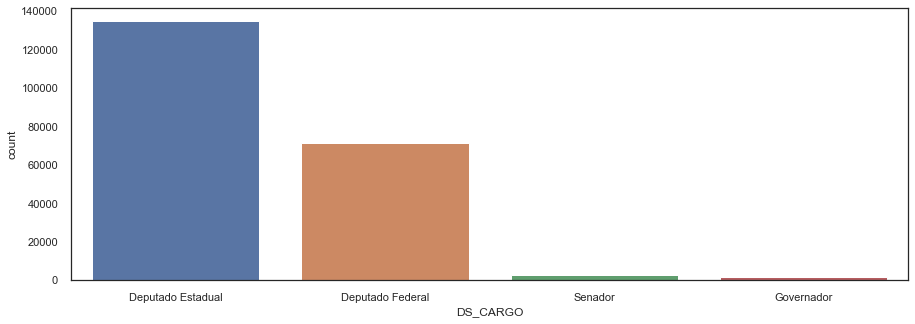

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(data=dados_votacao_pe, x='DS_CARGO', order=dados_votacao_pe.DS_CARGO.value_counts().index);

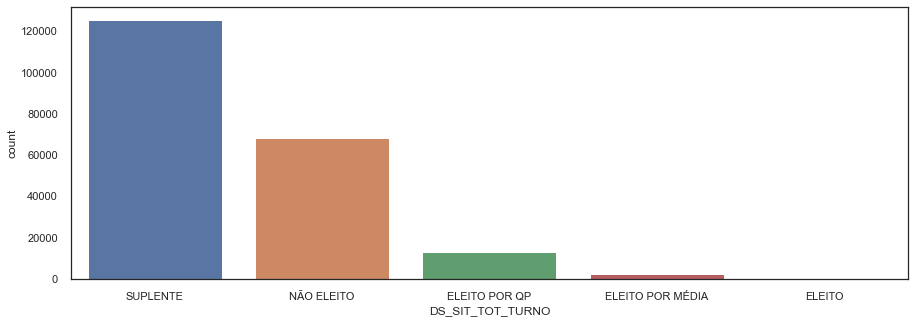

In [44]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=0)
sns.countplot(data=dados_votacao_pe, x='DS_SIT_TOT_TURNO', order=dados_votacao_pe.DS_SIT_TOT_TURNO.value_counts().index);

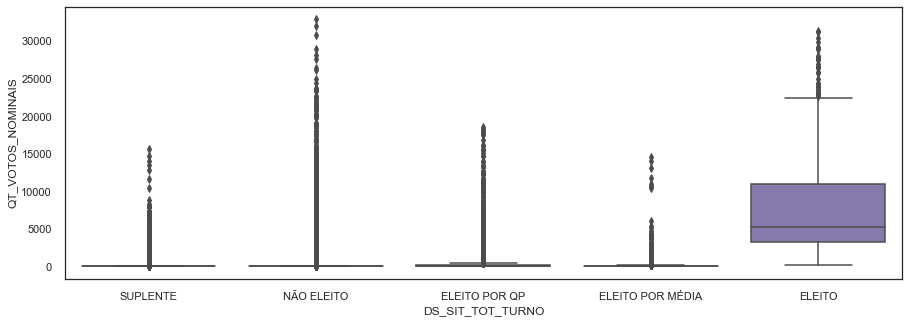

In [45]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=0)
sns.boxplot(dados_votacao_pe['DS_SIT_TOT_TURNO'],dados_votacao_pe['QT_VOTOS_NOMINAIS']);

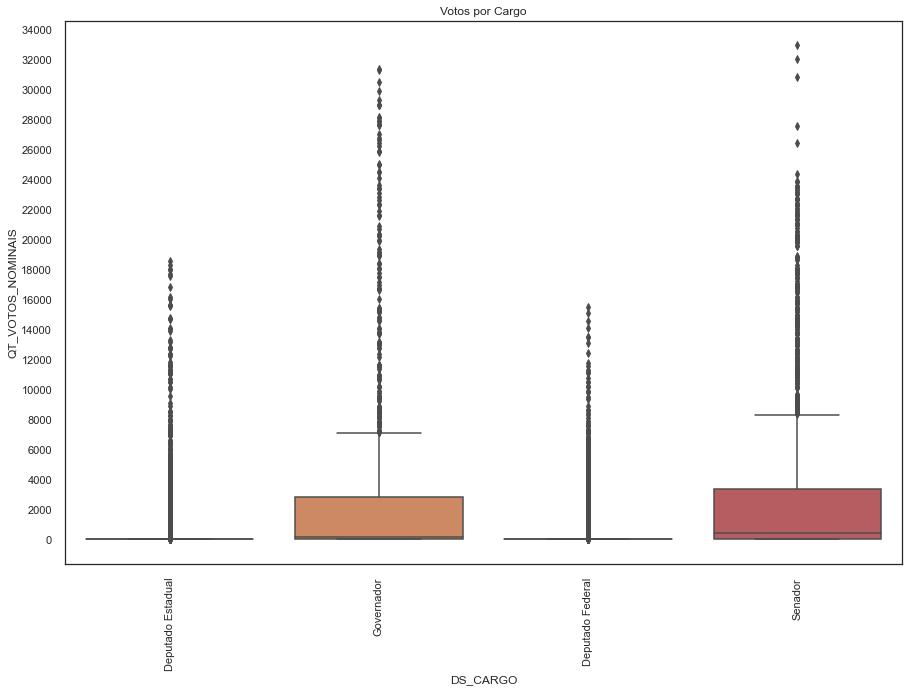

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(dados_votacao_pe['DS_CARGO'],dados_votacao_pe['QT_VOTOS_NOMINAIS'])

# Inserir o label
plt.title('Votos por Cargo')

# Rotacionar o label
plt.xticks(rotation=90)

# Ajustando escala Y
plt.locator_params(axis='y', nbins=20)

plt.show()

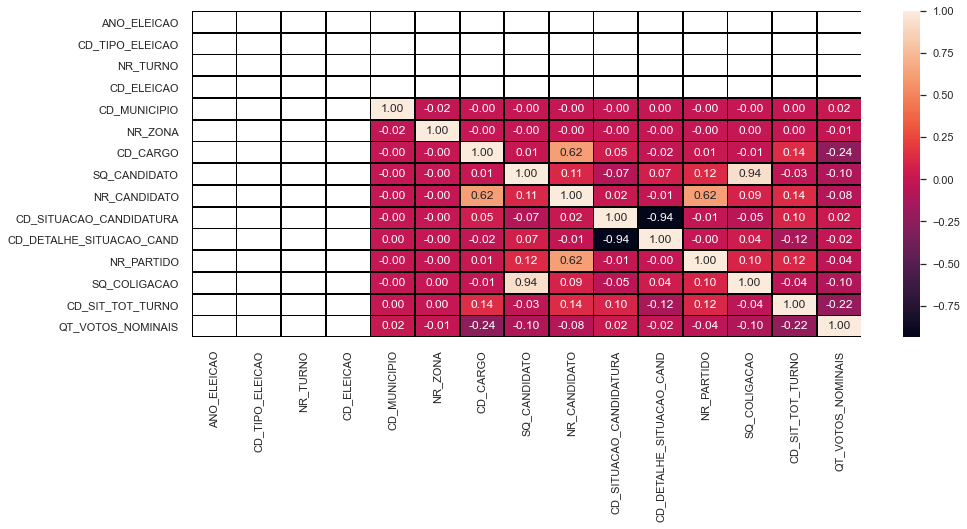

In [47]:
f, ax = plt.subplots(figsize=(15,6))
sns.heatmap(dados_votacao_pe.corr(), annot=True, fmt='.2f', linecolor='black',ax=ax, lw=.7);

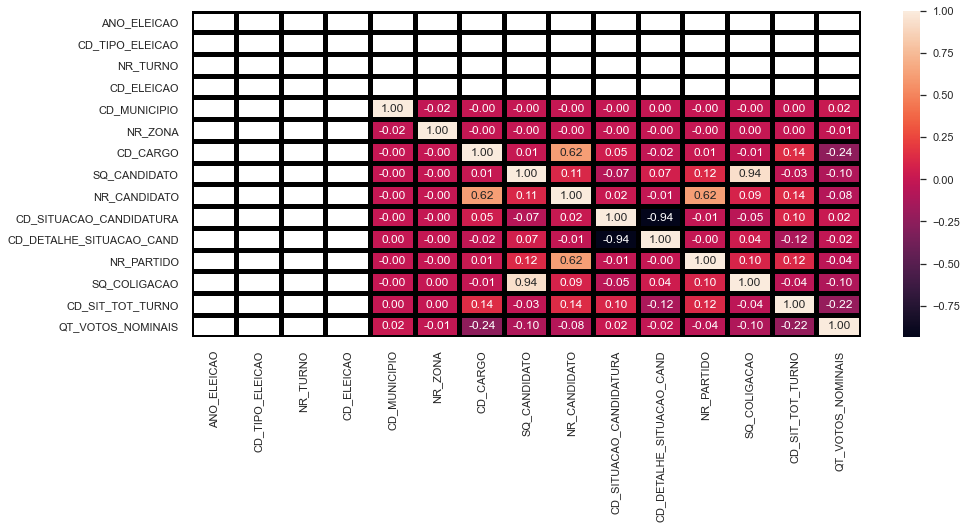

In [48]:
# Correlação entre as variáveis numéricas
f,ax = plt.subplots(figsize=(15,6))
sns.heatmap(dados_votacao_pe.corr(), annot=True, fmt='.2f', ax=ax, linecolor='black', lw=4)
plt.show()

In [49]:
#dados_votacao_pe[dados_votacao_pe['SG_UF']=='PE'].head().T
dados_votacao_br[dados_votacao_pe['SG_UF']=='PE'].head().T

,0,1,2,3,4
DT_GERACAO,27/09/2020,27/09/2020,27/09/2020,27/09/2020,27/09/2020
HH_GERACAO,19:20:08,19:20:08,19:20:08,19:20:08,19:20:08
ANO_ELEICAO,2018,2018,2018,2018,2018
CD_TIPO_ELEICAO,2,2,2,2,2
NM_TIPO_ELEICAO,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária
NR_TURNO,1,1,1,1,1
CD_ELEICAO,295,295,295,295,295
DS_ELEICAO,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018,ELEIÇÃO GERAL FEDERAL 2018
DT_ELEICAO,07/10/2018,07/10/2018,07/10/2018,07/10/2018,07/10/2018
TP_ABRANGENCIA,F,F,F,F,F


In [50]:
# Ordenar o dataframe pela quantidade de votos e depois deixar apenas o primeiro
# registro de cada municipio
dados_votacao_pe.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False).head(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
68594,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,25,DEM,Democratas,170000050149,PERNAMBUCO VAI MUDAR,PTB / PPS / PSDB / DEM / PSC / PRB / PV / PODE...,4,NÃO ELEITO,N,32920
40660,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,25,DEM,Democratas,170000050149,PERNAMBUCO VAI MUDAR,PTB / PPS / PSDB / DEM / PSC / PRB / PV / PODE...,4,NÃO ELEITO,N,32037
183105,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,40,PSB,Partido Socialista Brasileiro,170000050130,FRENTE POPULAR DE PERNAMBUCO,PSB / PC do B / PT / MDB / PP / PR / PMN / PTC...,1,ELEITO,N,31334
92947,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,40,PSB,Partido Socialista Brasileiro,170000050130,FRENTE POPULAR DE PERNAMBUCO,PSB / PC do B / PT / MDB / PP / PR / PMN / PTC...,1,ELEITO,N,31257
25297,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,25,DEM,Democratas,170000050149,PERNAMBUCO VAI MUDAR,PTB / PPS / PSDB / DEM / PSC / PRB / PV / PODE...,4,NÃO ELEITO,N,30815
15557,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,40,PSB,Partido Socialista Brasileiro,170000050130,FRENTE POPULAR DE PERNAMBUCO,PSB / PC do B / PT / MDB / PP / PR / PMN / PTC...,1,ELEITO,N,30491
166004,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,40,PSB,Partido Socialista Brasileiro,170000050130,FRENTE POPULAR DE PERNAMBUCO,PSB / PC do B / PT / MDB / PP / PR / PMN / PTC...,1,ELEITO,N,29846
112179,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,40,PSB,Partido Socialista Brasileiro,170000050130,FRENTE POPULAR DE PERNAMBUCO,PSB / PC do B / PT / MDB / PP / PR / PMN / PTC...,1,ELEITO,N,29279
5548,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,40,PSB,Partido Socialista Brasileiro,170000050130,FRENTE POPULAR DE PERNAMBUCO,PSB / PC do B / PT / MDB / PP / PR / PMN / PTC...,1,ELEITO,N,28966
65669,27/09/2020,19:13:51,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,14,PTB,Partido Trabalhista Brasileiro,170000050149,PERNAMBUCO VAI MUDAR,PTB / PPS / PSDB / DEM / PSC / PRB / PV / PODE...,4,NÃO ELEITO,N,28946


In [51]:
dados_votacao_pe.groupby('DS_CARGO').DS_CARGO.count()

DS_CARGO
Deputado Estadual    134596
Deputado Federal      71060
Governador             1463
Senador                2508
Name: DS_CARGO, dtype: int64

In [52]:
dados_votacao_pe.groupby('DS_DETALHE_SITUACAO_CAND').DS_DETALHE_SITUACAO_CAND.count()

DS_DETALHE_SITUACAO_CAND
DEFERIDO                  201476
DEFERIDO COM RECURSO         209
INDEFERIDO                  6061
INDEFERIDO COM RECURSO       627
RENÚNCIA                    1254
Name: DS_DETALHE_SITUACAO_CAND, dtype: int64

In [53]:
dados_votacao_pe.groupby('DS_SITUACAO_CANDIDATURA').DS_SITUACAO_CANDIDATURA.count()

DS_SITUACAO_CANDIDATURA
APTO      202312
INAPTO      7315
Name: DS_SITUACAO_CANDIDATURA, dtype: int64

In [54]:
dados_votacao_pe.groupby('SG_PARTIDO').SG_PARTIDO.count()

SG_PARTIDO
AVANTE            7942
DC                7733
DEM               3135
MDB                836
NOVO              2090
PATRI            16302
PC do B          12122
PCB               1463
PCO                836
PDT               4180
PHS               5643
PMB                209
PMN               3762
PODE              1254
PP               10868
PPL               5225
PPS               9614
PR                4180
PRB               3971
PROS              9823
PRP              13585
PRTB              6479
PSB               8987
PSC               9614
PSD               1045
PSDB              5016
PSL               5852
PSOL             14003
PSTU              1463
PT                9196
PTB               4598
PTC               1254
PV                4389
REDE              8569
SOLIDARIEDADE     4389
Name: SG_PARTIDO, dtype: int64

In [55]:
dados_votacao_pe.groupby('DS_SIT_TOT_TURNO').DS_SIT_TOT_TURNO.count()

DS_SIT_TOT_TURNO
ELEITO                 627
ELEITO POR MÉDIA      2508
ELEITO POR QP        12958
NÃO ELEITO           68134
SUPLENTE            125400
Name: DS_SIT_TOT_TURNO, dtype: int64

In [56]:
# Informações estatistica da base de dados.
dados_votacao_pe.describe().round(2)

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,CD_MUNICIPIO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
count,209627.0,209627.0,209627.0,209627.0,209627.00,209627.00,209627.00,2.096270e+05,209627.00,209627.00,209627.00,209627.00,2.096270e+05,209627.00,209627.00
mean,2018.0,2.0,1.0,297.0,24619.72,70.35,6.61,1.700006e+11,25980.12,11.69,2.39,37.97,1.700001e+11,4.45,88.93
std,0.0,0.0,0.0,0.0,1060.80,39.43,0.59,6.794250e+03,24218.76,1.65,2.08,21.49,1.737500e+02,0.82,841.11
min,2018.0,2.0,1.0,297.0,23000.00,1.00,3.00,1.700006e+11,14.00,3.00,2.00,10.00,1.700001e+11,1.00,0.00
25%,2018.0,2.0,1.0,297.0,23698.00,38.00,6.00,1.700006e+11,5023.00,12.00,2.00,20.00,1.700001e+11,4.00,0.00
50%,2018.0,2.0,1.0,297.0,24635.00,69.00,7.00,1.700006e+11,18580.00,12.00,2.00,33.00,1.700001e+11,5.00,0.00
75%,2018.0,2.0,1.0,297.0,25356.00,99.00,7.00,1.700006e+11,44446.00,12.00,2.00,51.00,1.700001e+11,5.00,3.00
max,2018.0,2.0,1.0,297.0,30015.00,150.00,7.00,1.700006e+11,90999.00,12.00,16.00,90.00,1.700001e+11,5.00,32920.00


In [57]:
# Variáveis categóricas:
dados_votacao_pe.describe(include=['O'])

,DT_GERACAO,HH_GERACAO,NM_TIPO_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,NM_MUNICIPIO,...,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO
count,209627,209627,209627,209627,209627,209627,209627,209627,209627,209627,...,209627,209627,209627,209627,209627,209627,209627,209627,209627,209627
unique,1,1,1,1,1,1,1,1,1,185,...,1,2,5,2,35,35,13,21,5,1
top,27/09/2020,19:13:51,Eleição Ordinária,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,PE,PE,PERNAMBUCO,RECIFE,...,#NULO#,APTO,DEFERIDO,Coligação,PATRI,Patriota,PARTIDO ISOLADO,PP / PR / SOLIDARIEDADE / PMN,SUPLENTE,N
freq,209627,209627,209627,209627,209627,209627,209627,209627,209627,11033,...,209627,202312,201476,147345,16302,16302,62282,23199,125400,209627


In [58]:
dados_votacao_pe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209627 entries, 0 to 209626
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DT_GERACAO                209627 non-null  object
 1   HH_GERACAO                209627 non-null  object
 2   ANO_ELEICAO               209627 non-null  int64 
 3   CD_TIPO_ELEICAO           209627 non-null  int64 
 4   NM_TIPO_ELEICAO           209627 non-null  object
 5   NR_TURNO                  209627 non-null  int64 
 6   CD_ELEICAO                209627 non-null  int64 
 7   DS_ELEICAO                209627 non-null  object
 8   DT_ELEICAO                209627 non-null  object
 9   TP_ABRANGENCIA            209627 non-null  object
 10  SG_UF                     209627 non-null  object
 11  SG_UE                     209627 non-null  object
 12  NM_UE                     209627 non-null  object
 13  CD_MUNICIPIO              209627 non-null  int64 
 14  NM_M

In [59]:
# Número de linhas e coluna:
dados_votacao_pe.shape

(209627, 38)

In [60]:
# Numero de celulas
dados_votacao_pe.size

7965826

In [61]:
# Retorna o nome da colunas do dataframe
dados_votacao_pe.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'CD_SITUACAO_CANDIDATURA',
       'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND',
       'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO', 'ST_VOTO_EM_TRANSITO',
       'QT_VOTOS_NOMINAIS'],
      dtype='object')

In [62]:
# transforma as colunas em lista
dados_votacao_pe.columns.tolist()

['DT_GERACAO',
 'HH_GERACAO',
 'ANO_ELEICAO',
 'CD_TIPO_ELEICAO',
 'NM_TIPO_ELEICAO',
 'NR_TURNO',
 'CD_ELEICAO',
 'DS_ELEICAO',
 'DT_ELEICAO',
 'TP_ABRANGENCIA',
 'SG_UF',
 'SG_UE',
 'NM_UE',
 'CD_MUNICIPIO',
 'NM_MUNICIPIO',
 'NR_ZONA',
 'CD_CARGO',
 'DS_CARGO',
 'SQ_CANDIDATO',
 'NR_CANDIDATO',
 'NM_CANDIDATO',
 'NM_URNA_CANDIDATO',
 'NM_SOCIAL_CANDIDATO',
 'CD_SITUACAO_CANDIDATURA',
 'DS_SITUACAO_CANDIDATURA',
 'CD_DETALHE_SITUACAO_CAND',
 'DS_DETALHE_SITUACAO_CAND',
 'TP_AGREMIACAO',
 'NR_PARTIDO',
 'SG_PARTIDO',
 'NM_PARTIDO',
 'SQ_COLIGACAO',
 'NM_COLIGACAO',
 'DS_COMPOSICAO_COLIGACAO',
 'CD_SIT_TOT_TURNO',
 'DS_SIT_TOT_TURNO',
 'ST_VOTO_EM_TRANSITO',
 'QT_VOTOS_NOMINAIS']

In [63]:
#Removendo duplicatas se houver
dados_votacao_pe.drop_duplicates(keep=False, inplace=True)

In [64]:
# Consultando linhas com valore faltantes.
dados_votacao_pe.isnull().sum().sort_values(ascending=False)

QT_VOTOS_NOMINAIS           0
TP_ABRANGENCIA              0
CD_CARGO                    0
NR_ZONA                     0
NM_MUNICIPIO                0
CD_MUNICIPIO                0
NM_UE                       0
SG_UE                       0
SG_UF                       0
DT_ELEICAO                  0
ST_VOTO_EM_TRANSITO         0
DS_ELEICAO                  0
CD_ELEICAO                  0
NR_TURNO                    0
NM_TIPO_ELEICAO             0
CD_TIPO_ELEICAO             0
ANO_ELEICAO                 0
HH_GERACAO                  0
DS_CARGO                    0
SQ_CANDIDATO                0
NR_CANDIDATO                0
NM_CANDIDATO                0
DS_SIT_TOT_TURNO            0
CD_SIT_TOT_TURNO            0
DS_COMPOSICAO_COLIGACAO     0
NM_COLIGACAO                0
SQ_COLIGACAO                0
NM_PARTIDO                  0
SG_PARTIDO                  0
NR_PARTIDO                  0
TP_AGREMIACAO               0
DS_DETALHE_SITUACAO_CAND    0
CD_DETALHE_SITUACAO_CAND    0
DS_SITUACA

In [65]:
# Mostrando somente os nomes das colunas numéricas
colunas_numericas = dados_votacao_pe.describe().columns
colunas_numericas

Index(['ANO_ELEICAO', 'CD_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO',
       'CD_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO',
       'CD_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'NR_PARTIDO',
       'SQ_COLIGACAO', 'CD_SIT_TOT_TURNO', 'QT_VOTOS_NOMINAIS'],
      dtype='object')

In [66]:
# Mostrando somente os nomes das colunas textuais
colunas_textuais = np.setdiff1d(dados_votacao_pe.columns, colunas_numericas)
colunas_textuais

array(['DS_CARGO', 'DS_COMPOSICAO_COLIGACAO', 'DS_DETALHE_SITUACAO_CAND',
       'DS_ELEICAO', 'DS_SITUACAO_CANDIDATURA', 'DS_SIT_TOT_TURNO',
       'DT_ELEICAO', 'DT_GERACAO', 'HH_GERACAO', 'NM_CANDIDATO',
       'NM_COLIGACAO', 'NM_MUNICIPIO', 'NM_PARTIDO',
       'NM_SOCIAL_CANDIDATO', 'NM_TIPO_ELEICAO', 'NM_UE',
       'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'SG_UE', 'SG_UF',
       'ST_VOTO_EM_TRANSITO', 'TP_ABRANGENCIA', 'TP_AGREMIACAO'],
      dtype=object)

In [67]:
# Número de registros
len(dados_votacao_pe)

209627

In [68]:
# # Filtra apenas os candidatos a Governador
dados_votacao_pe = dados_votacao_pe[dados_votacao_pe['CD_CARGO']== 3] 
dados_votacao_pe.tail().T

,209081,209082,209083,209099,209398
DT_GERACAO,27/09/2020,27/09/2020,27/09/2020,27/09/2020,27/09/2020
HH_GERACAO,19:13:51,19:13:51,19:13:51,19:13:51,19:13:51
ANO_ELEICAO,2018,2018,2018,2018,2018
CD_TIPO_ELEICAO,2,2,2,2,2
NM_TIPO_ELEICAO,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária,Eleição Ordinária
NR_TURNO,1,1,1,1,1
CD_ELEICAO,297,297,297,297,297
DS_ELEICAO,ELEIÇÕES GERAIS ESTADUAIS 2018,ELEIÇÕES GERAIS ESTADUAIS 2018,ELEIÇÕES GERAIS ESTADUAIS 2018,ELEIÇÕES GERAIS ESTADUAIS 2018,ELEIÇÕES GERAIS ESTADUAIS 2018
DT_ELEICAO,07/10/2018,07/10/2018,07/10/2018,07/10/2018,07/10/2018
TP_ABRANGENCIA,E,E,E,E,E


In [69]:
dados_votacao_pe['NM_COLIGACAO'].value_counts().reset_index()

,index,NM_COLIGACAO
0,PARTIDO ISOLADO,627
1,FRENTE POPULAR DE PERNAMBUCO,209
2,O PERNAMBUCO QUE VOCÊ QUER,209
3,PERNAMBUCO VAI MUDAR,209
4,A ESPERANÇA NÃO TEM MEDO,209


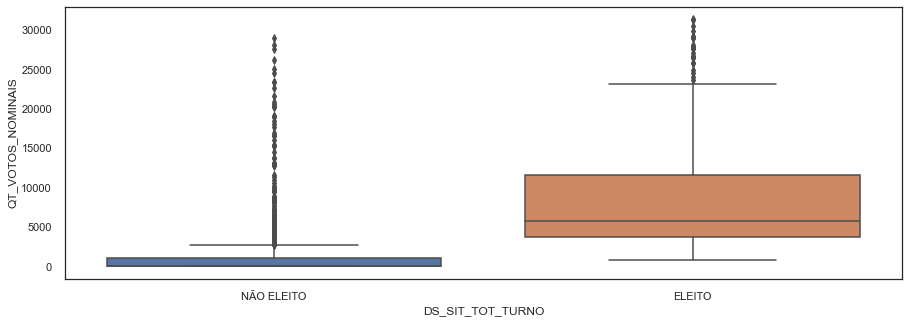

In [70]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=0)
sns.boxplot(dados_votacao_pe['DS_SIT_TOT_TURNO'],dados_votacao_pe['QT_VOTOS_NOMINAIS']);

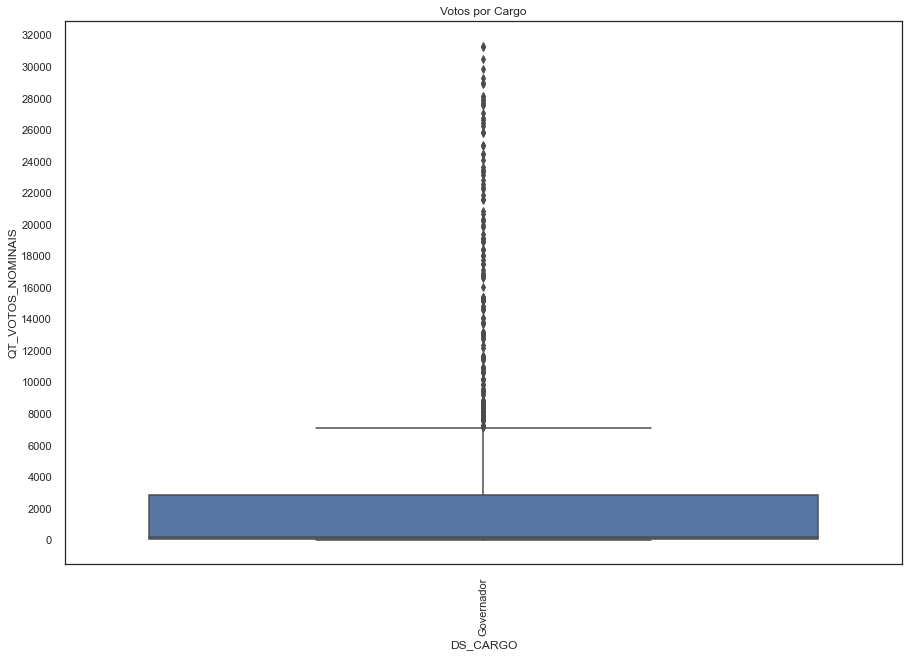

In [71]:
plt.figure(figsize=(15,10))
sns.boxplot(dados_votacao_pe['DS_CARGO'],dados_votacao_pe['QT_VOTOS_NOMINAIS'])

plt.title('Votos por Cargo')

# Rotacionar o label
plt.xticks(rotation=90)

# Ajustando escala Y
plt.locator_params(axis='y', nbins=20)

plt.show()

In [72]:
# Precisamos agregar os dados por municipio e candidato
dados_votacao_pe.groupby(['ANO_ELEICAO','SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO','DS_CARGO']).sum()

CD_TIPO_ELEICAO  \
ANO_ELEICAO SG_UF CD_MUNICIPIO NM_MUNICIPIO        NR_CANDIDATO NM_URNA_CANDIDATO  DS_CARGO                      
2018        PE    23000        QUIXABA             14           ARMANDO MONTEIRO   Governador                2   
                                                   16           SIMONE FONTANA     Governador                2   
                                                   18           JULIO LOSSIO       Governador                2   
                                                   29           ANA PATRICIA ALVES Governador                2   
                                                   40           PAULO CÂMARA       Governador                2   
...                                                                                                        ...   
                  30015        FERNANDO DE NORONHA 18           JULIO LOSSIO       Governador                2   
                                                   29           ANA PATRICIA ALVES Governador                2   
                                                   40           PAULO CÂMARA       Governador                2   
                                                   50           DANI PORTELA       Governador                2   
                                                   90           MAURÍCIO RANDS     Governador                2   

                                                                                               NR_TURNO  \
ANO_ELEICAO SG_UF CD_MUNICIPIO NM_MUNICIPIO        NR_CANDIDATO NM_URNA_CANDIDATO  DS_CARGO               
2018        PE    23000        QUIXABA             14           ARMANDO MONTEIRO   Governador         1   
                                                   16           SIMONE FONTANA     Governador         1   
                                                   18           JULIO LOSSIO       Governador         1   
                                                   29           ANA PATRICIA ALVES Governador         1   
                                                   40           PAULO CÂMARA       Governador         1   
...                                                                                                 ...   
                  30015        FERNANDO DE NORONHA 18           JULIO LOSSIO       Governador         1   
                                                   29           ANA PATRICIA ALVES Governador         1   
                                                   40           PAULO CÂMARA       Governador         1   
                                                   50           DANI PORTELA       Governador         1   
                                                   90           MAURÍCIO RANDS     Governador         1   

                                                                                               CD_ELEICAO  \
ANO_ELEICAO SG_UF CD_MUNICIPIO NM_MUNICIPIO        NR_CANDIDATO NM_URNA_CANDIDATO  DS_CARGO                 
2018        PE    23000        QUIXABA             14           ARMANDO MONTEIRO   Governador         297   
                                                   16           SIMONE FONTANA     Governador         297   
                                                   18           JULIO LOSSIO       Governador         297   
                                                   29           ANA PATRICIA ALVES Governador         297   
                                                   40           PAULO CÂMARA       Governador         297   
...                                                                                                   ...   
                  30015        FERNANDO DE NORONHA 18           JULIO LOSSIO       Governador         297   
                                                   29           ANA PATRICIA ALVES Governador         297   
                                                   40           PAULO CÂMARA       Governador         297   
                     

In [73]:
# Fazer o groupby, reindexar o indice, vai salvar isso em um dataframe
dados_votacao_pe = dados_votacao_pe.groupby(['ANO_ELEICAO','SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO','DS_CARGO']).sum().reset_index()

dados_votacao_pe.sample(4)

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
637,2018,PE,24490,ITAÍBA,14,ARMANDO MONTEIRO,Governador,2,1,297,143,3,170000605128,12,2,14,170000050149,4,5082
960,2018,PE,25410,SALGADINHO,16,SIMONE FONTANA,Governador,2,1,297,88,3,170000606877,12,2,16,170000050186,4,3
206,2018,PE,23299,BELÉM DE MARIA,29,ANA PATRICIA ALVES,Governador,2,1,297,43,3,170000624070,3,6,29,170000050637,4,0
97,2018,PE,23132,ALIANÇA,90,MAURÍCIO RANDS,Governador,2,1,297,125,3,170000617290,12,2,90,170000050461,4,180


In [74]:
# total de votos por candidato
dados_votacao_pe.groupby('NM_URNA_CANDIDATO')['QT_VOTOS_NOMINAIS'].sum().sort_values(ascending=False)

NM_URNA_CANDIDATO
PAULO CÂMARA          1918219
ARMANDO MONTEIRO      1361588
DANI PORTELA           188087
JULIO LOSSIO           176492
MAURÍCIO RANDS         129712
SIMONE FONTANA           9067
ANA PATRICIA ALVES          0
Name: QT_VOTOS_NOMINAIS, dtype: int64

In [75]:
# Selecionar apenas os dados do candidato a Goverdador Paulo Camara
dados_votacao_pe.loc[dados_votacao_pe.NM_URNA_CANDIDATO =='PAULO CÂMARA']

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
4,2018,PE,23000,QUIXABA,40,PAULO CÂMARA,Governador,2,1,297,98,3,170000604547,12,2,40,170000050130,1,2972
11,2018,PE,23019,AFOGADOS DA INGAZEIRA,40,PAULO CÂMARA,Governador,2,1,297,66,3,170000604547,12,2,40,170000050130,1,8089
18,2018,PE,23027,LAGOA DO CARRO,40,PAULO CÂMARA,Governador,2,1,297,20,3,170000604547,12,2,40,170000050130,1,5414
25,2018,PE,23035,AFRÂNIO,40,PAULO CÂMARA,Governador,2,1,297,107,3,170000604547,12,2,40,170000050130,1,2227
32,2018,PE,23043,SANTA CRUZ DA BAIXA VERDE,40,PAULO CÂMARA,Governador,2,1,297,71,3,170000604547,12,2,40,170000050130,1,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,2018,PE,26271,VITÓRIA DE SANTO ANTÃO,40,PAULO CÂMARA,Governador,4,2,594,120,6,340001209094,24,4,80,340000100260,2,28104
1271,2018,PE,26298,CAMARAGIBE,40,PAULO CÂMARA,Governador,4,2,594,265,6,340001209094,24,4,80,340000100260,2,32056
1278,2018,PE,26310,ABREU E LIMA,40,PAULO CÂMARA,Governador,2,1,297,119,3,170000604547,12,2,40,170000050130,1,27028
1285,2018,PE,26336,ITAPISSUMA,40,PAULO CÂMARA,Governador,2,1,297,131,3,170000604547,12,2,40,170000050130,1,7762


In [76]:
dados_votacao_pe[dados_votacao_pe['NR_CANDIDATO'] ==40]

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
4,2018,PE,23000,QUIXABA,40,PAULO CÂMARA,Governador,2,1,297,98,3,170000604547,12,2,40,170000050130,1,2972
11,2018,PE,23019,AFOGADOS DA INGAZEIRA,40,PAULO CÂMARA,Governador,2,1,297,66,3,170000604547,12,2,40,170000050130,1,8089
18,2018,PE,23027,LAGOA DO CARRO,40,PAULO CÂMARA,Governador,2,1,297,20,3,170000604547,12,2,40,170000050130,1,5414
25,2018,PE,23035,AFRÂNIO,40,PAULO CÂMARA,Governador,2,1,297,107,3,170000604547,12,2,40,170000050130,1,2227
32,2018,PE,23043,SANTA CRUZ DA BAIXA VERDE,40,PAULO CÂMARA,Governador,2,1,297,71,3,170000604547,12,2,40,170000050130,1,1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,2018,PE,26271,VITÓRIA DE SANTO ANTÃO,40,PAULO CÂMARA,Governador,4,2,594,120,6,340001209094,24,4,80,340000100260,2,28104
1271,2018,PE,26298,CAMARAGIBE,40,PAULO CÂMARA,Governador,4,2,594,265,6,340001209094,24,4,80,340000100260,2,32056
1278,2018,PE,26310,ABREU E LIMA,40,PAULO CÂMARA,Governador,2,1,297,119,3,170000604547,12,2,40,170000050130,1,27028
1285,2018,PE,26336,ITAPISSUMA,40,PAULO CÂMARA,Governador,2,1,297,131,3,170000604547,12,2,40,170000050130,1,7762


In [77]:
dados_votacao_incluso = dados_votacao_pe[dados_votacao_pe['NM_MUNICIPIO'].isin(['RECIFE', 'OLINDA', 'FERNANDO DE NORONHA', 'VITÓRIA DE SANTO ANTÃO','CAMARAGIBE','ABREU E LIMA'])]
dados_votacao_incluso.head()

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
784,2018,PE,24910,OLINDA,14,ARMANDO MONTEIRO,Governador,6,3,891,227,9,510001815384,36,6,42,510000150447,12,50904
785,2018,PE,24910,OLINDA,16,SIMONE FONTANA,Governador,6,3,891,227,9,510001820631,36,6,48,510000150558,12,596
786,2018,PE,24910,OLINDA,18,JULIO LOSSIO,Governador,6,3,891,227,9,510001882533,36,6,54,510000152271,12,9091
787,2018,PE,24910,OLINDA,29,ANA PATRICIA ALVES,Governador,6,3,891,227,9,510001872210,9,18,87,510000151911,12,0
788,2018,PE,24910,OLINDA,40,PAULO CÂMARA,Governador,6,3,891,227,9,510001813641,36,6,120,510000150390,3,81276


In [78]:
# Filtra pelo tipo de dado nnumerico
numerics = ['int16', 'int32', 'int64', 'float16','float32','float64']
dados_votacao_numerics = dados_votacao_pe.select_dtypes(include= numerics)
dados_votacao_numerics.head(10)

,ANO_ELEICAO,CD_MUNICIPIO,NR_CANDIDATO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
0,2018,23000,14,2,1,297,98,3,170000605128,12,2,14,170000050149,4,440
1,2018,23000,16,2,1,297,98,3,170000606877,12,2,16,170000050186,4,0
2,2018,23000,18,2,1,297,98,3,170000627511,12,2,18,170000050757,4,27
3,2018,23000,29,2,1,297,98,3,170000624070,3,6,29,170000050637,4,0
4,2018,23000,40,2,1,297,98,3,170000604547,12,2,40,170000050130,1,2972
5,2018,23000,50,2,1,297,98,3,170000607362,12,2,50,170000050194,4,37
6,2018,23000,90,2,1,297,98,3,170000617290,12,2,90,170000050461,4,5
7,2018,23019,14,2,1,297,66,3,170000605128,12,2,14,170000050149,4,6490
8,2018,23019,16,2,1,297,66,3,170000606877,12,2,16,170000050186,4,10
9,2018,23019,18,2,1,297,66,3,170000627511,12,2,18,170000050757,4,123


In [79]:
dados_votacao_pe.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False).head(10)

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
928,2018,PE,25313,RECIFE,40,PAULO CÂMARA,Governador,22,11,3267,344,33,1870006650017,132,22,440,1870000551430,11,311792
924,2018,PE,25313,RECIFE,14,ARMANDO MONTEIRO,Governador,22,11,3267,344,33,1870006656408,132,22,154,1870000551639,44,239123
669,2018,PE,24570,JABOATÃO DOS GUARARAPES,40,PAULO CÂMARA,Governador,8,4,1188,377,12,680002418188,48,8,160,680000200520,4,107669
665,2018,PE,24570,JABOATÃO DOS GUARARAPES,14,ARMANDO MONTEIRO,Governador,8,4,1188,377,12,680002420512,48,8,56,680000200596,16,82928
788,2018,PE,24910,OLINDA,40,PAULO CÂMARA,Governador,6,3,891,227,9,510001813641,36,6,120,510000150390,3,81276
929,2018,PE,25313,RECIFE,50,DANI PORTELA,Governador,22,11,3267,344,33,1870006680982,132,22,550,1870000552134,44,76045
865,2018,PE,25135,PAULISTA,40,PAULO CÂMARA,Governador,6,3,891,272,9,510001813641,36,6,120,510000150390,3,63229
399,2018,PE,23817,CARUARU,14,ARMANDO MONTEIRO,Governador,6,3,891,252,9,510001815384,36,6,42,510000150447,12,57523
403,2018,PE,23817,CARUARU,40,PAULO CÂMARA,Governador,6,3,891,252,9,510001813641,36,6,120,510000150390,3,50996
784,2018,PE,24910,OLINDA,14,ARMANDO MONTEIRO,Governador,6,3,891,227,9,510001815384,36,6,42,510000150447,12,50904


In [80]:
dados_votacao_pe.drop_duplicates()

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
0,2018,PE,23000,QUIXABA,14,ARMANDO MONTEIRO,Governador,2,1,297,98,3,170000605128,12,2,14,170000050149,4,440
1,2018,PE,23000,QUIXABA,16,SIMONE FONTANA,Governador,2,1,297,98,3,170000606877,12,2,16,170000050186,4,0
2,2018,PE,23000,QUIXABA,18,JULIO LOSSIO,Governador,2,1,297,98,3,170000627511,12,2,18,170000050757,4,27
3,2018,PE,23000,QUIXABA,29,ANA PATRICIA ALVES,Governador,2,1,297,98,3,170000624070,3,6,29,170000050637,4,0
4,2018,PE,23000,QUIXABA,40,PAULO CÂMARA,Governador,2,1,297,98,3,170000604547,12,2,40,170000050130,1,2972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2018,PE,30015,FERNANDO DE NORONHA,18,JULIO LOSSIO,Governador,2,1,297,4,3,170000627511,12,2,18,170000050757,4,40
1291,2018,PE,30015,FERNANDO DE NORONHA,29,ANA PATRICIA ALVES,Governador,2,1,297,4,3,170000624070,3,6,29,170000050637,4,0
1292,2018,PE,30015,FERNANDO DE NORONHA,40,PAULO CÂMARA,Governador,2,1,297,4,3,170000604547,12,2,40,170000050130,1,877
1293,2018,PE,30015,FERNANDO DE NORONHA,50,DANI PORTELA,Governador,2,1,297,4,3,170000607362,12,2,50,170000050194,4,77


In [81]:
# Filtra pelo tipo de dado não numerico
numerics = ['int16', 'int32', 'int64', 'float16','float32','float64']
dados_votacao_non_numerics = dados_votacao_pe.select_dtypes(exclude= numerics)
dados_votacao_non_numerics.head()

,SG_UF,NM_MUNICIPIO,NM_URNA_CANDIDATO,DS_CARGO
0,PE,QUIXABA,ARMANDO MONTEIRO,Governador
1,PE,QUIXABA,SIMONE FONTANA,Governador
2,PE,QUIXABA,JULIO LOSSIO,Governador
3,PE,QUIXABA,ANA PATRICIA ALVES,Governador
4,PE,QUIXABA,PAULO CÂMARA,Governador


In [82]:
dados_votacao_pe['QT_VOTOS_NOMINAIS'].describe(percentiles=[0.1, 0.2, 0.8, 0.99])

count      1295.000000
mean       2921.362934
std       13093.852153
min           0.000000
10%           0.000000
20%           6.000000
50%         149.000000
80%        3256.000000
99%       41438.540000
max      311792.000000
Name: QT_VOTOS_NOMINAIS, dtype: float64

In [83]:
dados_votacao_pe.agg({'QT_VOTOS_NOMINAIS':['min','max','skew','median'],
           'NR_CANDIDATO':['mean','min']})

,QT_VOTOS_NOMINAIS,NR_CANDIDATO
max,311792.000000,NaN
mean,NaN,36.714286
median,149.000000,NaN
min,0.000000,14.000000
skew,15.997518,NaN


In [84]:
dados_votacao_pe.groupby('NM_MUNICIPIO')['NM_URNA_CANDIDATO','QT_VOTOS_NOMINAIS'].mean().sort_values(by='QT_VOTOS_NOMINAIS', ascending=False)

,QT_VOTOS_NOMINAIS
NM_MUNICIPIO,
RECIFE,102606.428571
JABOATÃO DOS GUARARAPES,33097.428571
OLINDA,24242.857143
PAULISTA,18434.142857
CARUARU,17691.857143
...,...
PALMEIRINA,473.142857
SOLIDÃO,448.714286
ITACURUBA,367.428571


In [85]:
pd.pivot_table(dados_votacao_pe, index='NM_MUNICIPIO', aggfunc=np.mean)

,ANO_ELEICAO,CD_CARGO,CD_DETALHE_SITUACAO_CAND,CD_ELEICAO,CD_MUNICIPIO,CD_SITUACAO_CANDIDATURA,CD_SIT_TOT_TURNO,CD_TIPO_ELEICAO,NR_CANDIDATO,NR_PARTIDO,NR_TURNO,NR_ZONA,QT_VOTOS_NOMINAIS,SQ_CANDIDATO,SQ_COLIGACAO
NM_MUNICIPIO,,,,,,,,,,,,,,,
ABREU E LIMA,2018,3,2.571429,297,26310,10.714286,3.571429,2,36.714286,36.714286,1,119,6668.571429,170000613255,1.700001e+11
AFOGADOS DA INGAZEIRA,2018,3,2.571429,297,23019,10.714286,3.571429,2,36.714286,36.714286,1,66,2168.000000,170000613255,1.700001e+11
AFRÂNIO,2018,3,2.571429,297,23035,10.714286,3.571429,2,36.714286,36.714286,1,107,1297.285714,170000613255,1.700001e+11
AGRESTINA,2018,3,2.571429,297,23051,10.714286,3.571429,2,36.714286,36.714286,1,86,1479.285714,170000613255,1.700001e+11
ALAGOINHA,2018,3,2.571429,297,23116,10.714286,3.571429,2,36.714286,36.714286,1,120,899.714286,170000613255,1.700001e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VICÊNCIA,2018,3,2.571429,297,26255,10.714286,3.571429,2,36.714286,36.714286,1,90,1768.285714,170000613255,1.700001e+11
VITÓRIA DE SANTO ANTÃO,2018,6,5.142857,594,26271,21.428571,7.142857,4,36.714286,73.428571,2,120,7703.714286,340001226510,3.400001e+11
XEXÉU,2018,3,2.571429,297,23060,10.714286,3.571429,2,36.714286,36.714286,1,38,756.142857,170000613255,1.700001e+11


In [86]:
pd.pivot_table(dados_votacao_pe, index=['NM_MUNICIPIO'], values=['NM_URNA_CANDIDATO','DS_CARGO','QT_VOTOS_NOMINAIS'], aggfunc=np.mean)

,QT_VOTOS_NOMINAIS
NM_MUNICIPIO,
ABREU E LIMA,6668.571429
AFOGADOS DA INGAZEIRA,2168.000000
AFRÂNIO,1297.285714
AGRESTINA,1479.285714
ALAGOINHA,899.714286
...,...
VICÊNCIA,1768.285714
VITÓRIA DE SANTO ANTÃO,7703.714286
XEXÉU,756.142857


In [87]:
pd.pivot_table(dados_votacao_pe, index=['NM_MUNICIPIO'], columns=['NR_CANDIDATO'],values=['NM_URNA_CANDIDATO','DS_CARGO','QT_VOTOS_NOMINAIS'], aggfunc=np.mean)

QT_VOTOS_NOMINAIS                                 
NR_CANDIDATO                          14   16    18 29     40    50    90
NM_MUNICIPIO                                                             
ABREU E LIMA                       13765  127  1796  0  27028  2564  1400
AFOGADOS DA INGAZEIRA               6490   10   123  0   8089   357   107
AFRÂNIO                             3751    4  2791  0   2227    26   282
AGRESTINA                           5858   10   190  0   3896   163   238
ALAGOINHA                           1428    5    80  0   4421   296    68
...                                  ...  ...   ... ..    ...   ...   ...
VICÊNCIA                            3797   15   276  0   7900   264   126
VITÓRIA DE SANTO ANTÃO             20459   91  1769  0  28104  1896  1607
XEXÉU                                671    7    91  0   3601    49   874
ÁGUA PRETA                          2839   12    99  0   5650   103  2337
ÁGUAS BELAS                         4938   15   334  0  11538   138   149

[185 rows x 7 columns]

In [88]:
# Total de votos em Recife /APURAÇÃO POR ZONA ELEITORA
total_recife=dados_votacao_pe.loc[(dados_votacao_pe.NM_URNA_CANDIDATO =='PAULO CÂMARA') & (dados_votacao_pe.NM_MUNICIPIO == 'RECIFE')] 

In [89]:
total_recife

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
928,2018,PE,25313,RECIFE,40,PAULO CÂMARA,Governador,22,11,3267,344,33,1870006650017,132,22,440,1870000551430,11,311792


In [90]:
# Vamos verificar novamente a cidade de Recife
dados_votacao_pe[dados_votacao_pe['NM_MUNICIPIO'] == 'RECIFE']

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
924,2018,PE,25313,RECIFE,14,ARMANDO MONTEIRO,Governador,22,11,3267,344,33,1870006656408,132,22,154,1870000551639,44,239123
925,2018,PE,25313,RECIFE,16,SIMONE FONTANA,Governador,22,11,3267,344,33,1870006675647,132,22,176,1870000552046,44,3547
926,2018,PE,25313,RECIFE,18,JULIO LOSSIO,Governador,22,11,3267,344,33,1870006902621,132,22,198,1870000558327,44,41141
927,2018,PE,25313,RECIFE,29,ANA PATRICIA ALVES,Governador,22,11,3267,344,33,1870006864770,33,66,319,1870000557007,44,0
928,2018,PE,25313,RECIFE,40,PAULO CÂMARA,Governador,22,11,3267,344,33,1870006650017,132,22,440,1870000551430,11,311792
929,2018,PE,25313,RECIFE,50,DANI PORTELA,Governador,22,11,3267,344,33,1870006680982,132,22,550,1870000552134,44,76045
930,2018,PE,25313,RECIFE,90,MAURÍCIO RANDS,Governador,22,11,3267,344,33,1870006790190,132,22,990,1870000555071,44,46597


In [91]:
# Ordenar o dataframe pela quantidade de votos e depois deixar apenas o primeiro
# registro de cada municipio
dados_votacao_pe.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False).head(10)

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
928,2018,PE,25313,RECIFE,40,PAULO CÂMARA,Governador,22,11,3267,344,33,1870006650017,132,22,440,1870000551430,11,311792
924,2018,PE,25313,RECIFE,14,ARMANDO MONTEIRO,Governador,22,11,3267,344,33,1870006656408,132,22,154,1870000551639,44,239123
669,2018,PE,24570,JABOATÃO DOS GUARARAPES,40,PAULO CÂMARA,Governador,8,4,1188,377,12,680002418188,48,8,160,680000200520,4,107669
665,2018,PE,24570,JABOATÃO DOS GUARARAPES,14,ARMANDO MONTEIRO,Governador,8,4,1188,377,12,680002420512,48,8,56,680000200596,16,82928
788,2018,PE,24910,OLINDA,40,PAULO CÂMARA,Governador,6,3,891,227,9,510001813641,36,6,120,510000150390,3,81276
929,2018,PE,25313,RECIFE,50,DANI PORTELA,Governador,22,11,3267,344,33,1870006680982,132,22,550,1870000552134,44,76045
865,2018,PE,25135,PAULISTA,40,PAULO CÂMARA,Governador,6,3,891,272,9,510001813641,36,6,120,510000150390,3,63229
399,2018,PE,23817,CARUARU,14,ARMANDO MONTEIRO,Governador,6,3,891,252,9,510001815384,36,6,42,510000150447,12,57523
403,2018,PE,23817,CARUARU,40,PAULO CÂMARA,Governador,6,3,891,252,9,510001813641,36,6,120,510000150390,3,50996
784,2018,PE,24910,OLINDA,14,ARMANDO MONTEIRO,Governador,6,3,891,227,9,510001815384,36,6,42,510000150447,12,50904


In [92]:
# Vamos ordenar
dados_votacao_pe.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False, inplace=True)

# dropar as linhas duplicadas, mantendo a primeira
dados_votacao_pe.drop_duplicates(subset='CD_MUNICIPIO', keep='first', inplace=True)

dados_votacao_pe.head(10)

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
928,2018,PE,25313,RECIFE,40,PAULO CÂMARA,Governador,22,11,3267,344,33,1870006650017,132,22,440,1870000551430,11,311792
669,2018,PE,24570,JABOATÃO DOS GUARARAPES,40,PAULO CÂMARA,Governador,8,4,1188,377,12,680002418188,48,8,160,680000200520,4,107669
788,2018,PE,24910,OLINDA,40,PAULO CÂMARA,Governador,6,3,891,227,9,510001813641,36,6,120,510000150390,3,81276
865,2018,PE,25135,PAULISTA,40,PAULO CÂMARA,Governador,6,3,891,272,9,510001813641,36,6,120,510000150390,3,63229
399,2018,PE,23817,CARUARU,14,ARMANDO MONTEIRO,Governador,6,3,891,252,9,510001815384,36,6,42,510000150447,12,57523
893,2018,PE,25216,PETROLINA,40,PAULO CÂMARA,Governador,6,3,891,372,9,510001813641,36,6,120,510000150390,3,48707
319,2018,PE,23574,CABO DE SANTO AGOSTINHO,40,PAULO CÂMARA,Governador,4,2,594,136,6,340001209094,24,4,80,340000100260,2,46100
1271,2018,PE,26298,CAMARAGIBE,40,PAULO CÂMARA,Governador,4,2,594,265,6,340001209094,24,4,80,340000100260,2,32056
532,2018,PE,24198,GARANHUNS,14,ARMANDO MONTEIRO,Governador,2,1,297,56,3,170000605128,12,2,14,170000050149,4,28946
1264,2018,PE,26271,VITÓRIA DE SANTO ANTÃO,40,PAULO CÂMARA,Governador,4,2,594,120,6,340001209094,24,4,80,340000100260,2,28104


In [93]:
# Agora vamos criar uma coluna representando o resultado da eleição naquele municipio
# sendo que o Resultado é True se o candidato PAULO CÂMARA venceu naquele municipio
# e False em caso contrário
dados_votacao_pe['RESULTADO'] = dados_votacao_pe['NR_CANDIDATO'].apply(lambda x: x == 40)

In [94]:
# Verificando o resultado
dados_votacao_pe.head(10)

,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,DS_CARGO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,RESULTADO
928,2018,PE,25313,RECIFE,40,PAULO CÂMARA,Governador,22,11,3267,344,33,1870006650017,132,22,440,1870000551430,11,311792,True
669,2018,PE,24570,JABOATÃO DOS GUARARAPES,40,PAULO CÂMARA,Governador,8,4,1188,377,12,680002418188,48,8,160,680000200520,4,107669,True
788,2018,PE,24910,OLINDA,40,PAULO CÂMARA,Governador,6,3,891,227,9,510001813641,36,6,120,510000150390,3,81276,True
865,2018,PE,25135,PAULISTA,40,PAULO CÂMARA,Governador,6,3,891,272,9,510001813641,36,6,120,510000150390,3,63229,True
399,2018,PE,23817,CARUARU,14,ARMANDO MONTEIRO,Governador,6,3,891,252,9,510001815384,36,6,42,510000150447,12,57523,False
893,2018,PE,25216,PETROLINA,40,PAULO CÂMARA,Governador,6,3,891,372,9,510001813641,36,6,120,510000150390,3,48707,True
319,2018,PE,23574,CABO DE SANTO AGOSTINHO,40,PAULO CÂMARA,Governador,4,2,594,136,6,340001209094,24,4,80,340000100260,2,46100,True
1271,2018,PE,26298,CAMARAGIBE,40,PAULO CÂMARA,Governador,4,2,594,265,6,340001209094,24,4,80,340000100260,2,32056,True
532,2018,PE,24198,GARANHUNS,14,ARMANDO MONTEIRO,Governador,2,1,297,56,3,170000605128,12,2,14,170000050149,4,28946,False
1264,2018,PE,26271,VITÓRIA DE SANTO ANTÃO,40,PAULO CÂMARA,Governador,4,2,594,120,6,340001209094,24,4,80,340000100260,2,28104,True


In [95]:
# Contabilizando a quantidade de municípios

dados_votacao_pe['CD_MUNICIPIO'].nunique()

185

In [96]:
dados_votacao_pe = dados_votacao_pe.groupby(['SG_UF', 'NM_MUNICIPIO', 'CD_MUNICIPIO', 'NM_URNA_CANDIDATO','DS_CARGO']).sum().reset_index()
dados_votacao_pe.tail(1000)

,SG_UF,NM_MUNICIPIO,CD_MUNICIPIO,NM_URNA_CANDIDATO,DS_CARGO,ANO_ELEICAO,NR_CANDIDATO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,RESULTADO
0,PE,ABREU E LIMA,26310,PAULO CÂMARA,Governador,2018,40,2,1,297,119,3,170000604547,12,2,40,170000050130,1,27028,1
1,PE,AFOGADOS DA INGAZEIRA,23019,PAULO CÂMARA,Governador,2018,40,2,1,297,66,3,170000604547,12,2,40,170000050130,1,8089,1
2,PE,AFRÂNIO,23035,ARMANDO MONTEIRO,Governador,2018,14,2,1,297,107,3,170000605128,12,2,14,170000050149,4,3751,0
3,PE,AGRESTINA,23051,ARMANDO MONTEIRO,Governador,2018,14,2,1,297,86,3,170000605128,12,2,14,170000050149,4,5858,0
4,PE,ALAGOINHA,23116,PAULO CÂMARA,Governador,2018,40,2,1,297,120,3,170000604547,12,2,40,170000050130,1,4421,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,PE,VICÊNCIA,26255,PAULO CÂMARA,Governador,2018,40,2,1,297,90,3,170000604547,12,2,40,170000050130,1,7900,1
181,PE,VITÓRIA DE SANTO ANTÃO,26271,PAULO CÂMARA,Governador,2018,40,4,2,594,120,6,340001209094,24,4,80,340000100260,2,28104,1
182,PE,XEXÉU,23060,PAULO CÂMARA,Governador,2018,40,2,1,297,38,3,170000604547,12,2,40,170000050130,1,3601,1
183,PE,ÁGUA PRETA,23078,PAULO CÂMARA,Governador,2018,40,2,1,297,38,3,170000604547,12,2,40,170000050130,1,5650,1


In [97]:
dados_votacao_pe.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False, inplace=True)
dados_votacao_pe.head(15)

,SG_UF,NM_MUNICIPIO,CD_MUNICIPIO,NM_URNA_CANDIDATO,DS_CARGO,ANO_ELEICAO,NR_CANDIDATO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,RESULTADO
130,PE,RECIFE,25313,PAULO CÂMARA,Governador,2018,40,22,11,3267,344,33,1870006650017,132,22,440,1870000551430,11,311792,1
85,PE,JABOATÃO DOS GUARARAPES,24570,PAULO CÂMARA,Governador,2018,40,8,4,1188,377,12,680002418188,48,8,160,680000200520,4,107669,1
109,PE,OLINDA,24910,PAULO CÂMARA,Governador,2018,40,6,3,891,227,9,510001813641,36,6,120,510000150390,3,81276,1
120,PE,PAULISTA,25135,PAULO CÂMARA,Governador,2018,40,6,3,891,272,9,510001813641,36,6,120,510000150390,3,63229,1
42,PE,CARUARU,23817,ARMANDO MONTEIRO,Governador,2018,14,6,3,891,252,9,510001815384,36,6,42,510000150447,12,57523,0
123,PE,PETROLINA,25216,PAULO CÂMARA,Governador,2018,40,6,3,891,372,9,510001813641,36,6,120,510000150390,3,48707,1
28,PE,CABO DE SANTO AGOSTINHO,23574,PAULO CÂMARA,Governador,2018,40,4,2,594,136,6,340001209094,24,4,80,340000100260,2,46100,1
34,PE,CAMARAGIBE,26298,PAULO CÂMARA,Governador,2018,40,4,2,594,265,6,340001209094,24,4,80,340000100260,2,32056,1
64,PE,GARANHUNS,24198,ARMANDO MONTEIRO,Governador,2018,14,2,1,297,56,3,170000605128,12,2,14,170000050149,4,28946,0
181,PE,VITÓRIA DE SANTO ANTÃO,26271,PAULO CÂMARA,Governador,2018,40,4,2,594,120,6,340001209094,24,4,80,340000100260,2,28104,1


In [98]:
#import pandas_profiling

In [99]:
# Relatorio visual das colunas do dataframe
#pandas_profiling.ProfileReport(dados_votacao_pe,  title = "Relatório de criação de perfil do Pandas")

In [100]:
#profile =pandas_profiling.ProfileReport(dados_votacao_pe)

In [101]:
#profile.to_file("PEreport.html")

In [102]:
#my_report = sv.analyze(dados_votacao_pe) # cria o reporte e chama de my_report
#my_report.show_html()

# sv.anlyze(dados).show_html()

In [103]:
#dados_votacao_pe = AV.AutoViz ('/eleicao/votacao/votacao_candidato_munzona_2018_PE.csv', sep=';')

In [104]:
# Vejam que os municípios aparecem mais de uma vez
# Eliminando os outros candidatos por município

dados_mais_votado_por_municipio = dados_votacao_pe.drop_duplicates(subset='CD_MUNICIPIO', keep='first')

dados_mais_votado_por_municipio.head(15)

,SG_UF,NM_MUNICIPIO,CD_MUNICIPIO,NM_URNA_CANDIDATO,DS_CARGO,ANO_ELEICAO,NR_CANDIDATO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,RESULTADO
130,PE,RECIFE,25313,PAULO CÂMARA,Governador,2018,40,22,11,3267,344,33,1870006650017,132,22,440,1870000551430,11,311792,1
85,PE,JABOATÃO DOS GUARARAPES,24570,PAULO CÂMARA,Governador,2018,40,8,4,1188,377,12,680002418188,48,8,160,680000200520,4,107669,1
109,PE,OLINDA,24910,PAULO CÂMARA,Governador,2018,40,6,3,891,227,9,510001813641,36,6,120,510000150390,3,81276,1
120,PE,PAULISTA,25135,PAULO CÂMARA,Governador,2018,40,6,3,891,272,9,510001813641,36,6,120,510000150390,3,63229,1
42,PE,CARUARU,23817,ARMANDO MONTEIRO,Governador,2018,14,6,3,891,252,9,510001815384,36,6,42,510000150447,12,57523,0
123,PE,PETROLINA,25216,PAULO CÂMARA,Governador,2018,40,6,3,891,372,9,510001813641,36,6,120,510000150390,3,48707,1
28,PE,CABO DE SANTO AGOSTINHO,23574,PAULO CÂMARA,Governador,2018,40,4,2,594,136,6,340001209094,24,4,80,340000100260,2,46100,1
34,PE,CAMARAGIBE,26298,PAULO CÂMARA,Governador,2018,40,4,2,594,265,6,340001209094,24,4,80,340000100260,2,32056,1
64,PE,GARANHUNS,24198,ARMANDO MONTEIRO,Governador,2018,14,2,1,297,56,3,170000605128,12,2,14,170000050149,4,28946,0
181,PE,VITÓRIA DE SANTO ANTÃO,26271,PAULO CÂMARA,Governador,2018,40,4,2,594,120,6,340001209094,24,4,80,340000100260,2,28104,1


In [120]:
dados_mais_votado_por_municipio.loc[dados_mais_votado_por_municipio['NM_URNA_CANDIDATO']=='PAULO CÂMARA'].max()

SG_UF                                  PE
NM_MUNICIPIO                  ÁGUAS BELAS
COD_TSE                             30015
NM_URNA_CANDIDATO            PAULO CÂMARA
DS_CARGO                       Governador
ANO_ELEICAO                          2018
NR_CANDIDATO                           40
CD_TIPO_ELEICAO                        22
NR_TURNO                               11
CD_ELEICAO                           3267
NR_ZONA                               377
CD_CARGO                               33
SQ_CANDIDATO                1870006650017
CD_SITUACAO_CANDIDATURA               132
CD_DETALHE_SITUACAO_CAND               22
NR_PARTIDO                            440
SQ_COLIGACAO                1870000551430
CD_SIT_TOT_TURNO                       11
QT_VOTOS_NOMINAIS                  311792
RESULTADO                               1
dtype: object

In [121]:
dados_mais_votado_por_municipio.loc[dados_mais_votado_por_municipio['NM_URNA_CANDIDATO']=='PAULO CÂMARA'].min()

SG_UF                                 PE
NM_MUNICIPIO                ABREU E LIMA
COD_TSE                            23000
NM_URNA_CANDIDATO           PAULO CÂMARA
DS_CARGO                      Governador
ANO_ELEICAO                         2018
NR_CANDIDATO                          40
CD_TIPO_ELEICAO                        2
NR_TURNO                               1
CD_ELEICAO                           297
NR_ZONA                                4
CD_CARGO                               3
SQ_CANDIDATO                170000604547
CD_SITUACAO_CANDIDATURA               12
CD_DETALHE_SITUACAO_CAND               2
NR_PARTIDO                            40
SQ_COLIGACAO                170000050130
CD_SIT_TOT_TURNO                       1
QT_VOTOS_NOMINAIS                    877
RESULTADO                              1
dtype: object

In [107]:
# Observamos agora que cada município aparentemente só tem uma linha, vamos confirmar chamando a função info

dados_mais_votado_por_municipio.shape

(185, 20)

In [108]:
# E o dataframe eleitoral

dados_mais_votado_por_municipio.head()

,SG_UF,NM_MUNICIPIO,CD_MUNICIPIO,NM_URNA_CANDIDATO,DS_CARGO,ANO_ELEICAO,NR_CANDIDATO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,RESULTADO
130,PE,RECIFE,25313,PAULO CÂMARA,Governador,2018,40,22,11,3267,344,33,1870006650017,132,22,440,1870000551430,11,311792,1
85,PE,JABOATÃO DOS GUARARAPES,24570,PAULO CÂMARA,Governador,2018,40,8,4,1188,377,12,680002418188,48,8,160,680000200520,4,107669,1
109,PE,OLINDA,24910,PAULO CÂMARA,Governador,2018,40,6,3,891,227,9,510001813641,36,6,120,510000150390,3,81276,1
120,PE,PAULISTA,25135,PAULO CÂMARA,Governador,2018,40,6,3,891,272,9,510001813641,36,6,120,510000150390,3,63229,1
42,PE,CARUARU,23817,ARMANDO MONTEIRO,Governador,2018,14,6,3,891,252,9,510001815384,36,6,42,510000150447,12,57523,0


In [109]:
# Portanto, o link que posso usar entre os dois conjuntos de dados é a coluna de códigos
# Entretanto, o IBGE usa um código e o TSE outro código, preciso então de uma equivalência entre eles
# Existe no GitHub do Estadão um repositório que apresenta essa correlação entre código IBGE e código TSE
# Vamos recuperar essa equivalência direto do Github do estadão
link_equivalencia_tse_ibge = 'https://raw.githubusercontent.com/estadao/como-votou-sua-vizinhanca/master/data/votos/correspondencia-tse-ibge.csv'
dados_equi_tse_ibge = pd.read_csv(link_equivalencia_tse_ibge)
dados_equi_tse_ibge.to_excel('equi_tse_ibge.xlsx')

In [110]:
# Mudando os nomes das colunas nos dois dataframes para ficarem iguais ao dataframe de equivalência
# Isso facilita a junção dos dataframes

dados_mais_votado_por_municipio.rename(columns={'CD_MUNICIPIO': 'COD_TSE'}, inplace=True)
dados_mapa.rename(columns={'CD_GEOCMU': 'GEOCOD_IBGE'}, inplace=True)

# Juntando o dataframe de equivalência ao dataframe de votação
dados_final = pd.merge(dados_equi_tse_ibge, dados_mais_votado_por_municipio, on='COD_TSE')
dados_final.head()

,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE,SG_UF,NM_MUNICIPIO,NM_URNA_CANDIDATO,DS_CARGO,...,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,RESULTADO
0,pe abreu e lima,ABREU E LIMA,PE,2600054,26310,NaN,PE,ABREU E LIMA,PAULO CÂMARA,Governador,...,119,3,170000604547,12,2,40,170000050130,1,27028,1
1,pe afogados da ingazeira,AFOGADOS DA INGAZEIRA,PE,2600104,23019,NaN,PE,AFOGADOS DA INGAZEIRA,PAULO CÂMARA,Governador,...,66,3,170000604547,12,2,40,170000050130,1,8089,1
2,pe afranio,AFRÂNIO,PE,2600203,23035,NaN,PE,AFRÂNIO,ARMANDO MONTEIRO,Governador,...,107,3,170000605128,12,2,14,170000050149,4,3751,0
3,pe agrestina,AGRESTINA,PE,2600302,23051,NaN,PE,AGRESTINA,ARMANDO MONTEIRO,Governador,...,86,3,170000605128,12,2,14,170000050149,4,5858,0
4,pe agua preta,ÁGUA PRETA,PE,2600401,23078,NaN,PE,ÁGUA PRETA,PAULO CÂMARA,Governador,...,38,3,170000604547,12,2,40,170000050130,1,5650,1


In [111]:
# Tenho colunas repetidas e desnecessárias, vou dropá-las

dados_final.drop(columns=['chave', 'NOME', 'UF', 'AJUSTE'], inplace=True)
dados_final.head()

,GEOCOD_IBGE,COD_TSE,SG_UF,NM_MUNICIPIO,NM_URNA_CANDIDATO,DS_CARGO,ANO_ELEICAO,NR_CANDIDATO,CD_TIPO_ELEICAO,NR_TURNO,...,NR_ZONA,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,RESULTADO
0,2600054,26310,PE,ABREU E LIMA,PAULO CÂMARA,Governador,2018,40,2,1,...,119,3,170000604547,12,2,40,170000050130,1,27028,1
1,2600104,23019,PE,AFOGADOS DA INGAZEIRA,PAULO CÂMARA,Governador,2018,40,2,1,...,66,3,170000604547,12,2,40,170000050130,1,8089,1
2,2600203,23035,PE,AFRÂNIO,ARMANDO MONTEIRO,Governador,2018,14,2,1,...,107,3,170000605128,12,2,14,170000050149,4,3751,0
3,2600302,23051,PE,AGRESTINA,ARMANDO MONTEIRO,Governador,2018,14,2,1,...,86,3,170000605128,12,2,14,170000050149,4,5858,0
4,2600401,23078,PE,ÁGUA PRETA,PAULO CÂMARA,Governador,2018,40,2,1,...,38,3,170000604547,12,2,40,170000050130,1,5650,1


In [112]:
# Agora preciso juntar ao df_final o GeoDataFrame
# Entretanto, tenho um problema, que veremos a seguir

dados_mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   NM_MUNICIP   5572 non-null   object  
 1   GEOCOD_IBGE  5572 non-null   object  
 2   geometry     5572 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 130.7+ KB


In [113]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GEOCOD_IBGE               185 non-null    int64 
 1   COD_TSE                   185 non-null    int64 
 2   SG_UF                     185 non-null    object
 3   NM_MUNICIPIO              185 non-null    object
 4   NM_URNA_CANDIDATO         185 non-null    object
 5   DS_CARGO                  185 non-null    object
 6   ANO_ELEICAO               185 non-null    int64 
 7   NR_CANDIDATO              185 non-null    int64 
 8   CD_TIPO_ELEICAO           185 non-null    int64 
 9   NR_TURNO                  185 non-null    int64 
 10  CD_ELEICAO                185 non-null    int64 
 11  NR_ZONA                   185 non-null    int64 
 12  CD_CARGO                  185 non-null    int64 
 13  SQ_CANDIDATO              185 non-null    int64 
 14  CD_SITUACAO_CANDIDATURA   

In [114]:
dados_mapa = dados_mapa.astype({'GEOCOD_IBGE': 'int64'})

In [115]:
# Agora os dois tipos de dados nos dois dataframes estão iguais, posso dar merge nos dois
dados_final = pd.merge(dados_final, dados_mapa, on='GEOCOD_IBGE')
dados_final.head()

,GEOCOD_IBGE,COD_TSE,SG_UF,NM_MUNICIPIO,NM_URNA_CANDIDATO,DS_CARGO,ANO_ELEICAO,NR_CANDIDATO,CD_TIPO_ELEICAO,NR_TURNO,...,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,RESULTADO,NM_MUNICIP,geometry
0,2600054,26310,PE,ABREU E LIMA,PAULO CÂMARA,Governador,2018,40,2,1,...,170000604547,12,2,40,170000050130,1,27028,1,ABREU E LIMA,"POLYGON ((-35.05411 -7.88004, -35.02347 -7.888..."
1,2600104,23019,PE,AFOGADOS DA INGAZEIRA,PAULO CÂMARA,Governador,2018,40,2,1,...,170000604547,12,2,40,170000050130,1,8089,1,AFOGADOS DA INGAZEIRA,"POLYGON ((-37.55881 -7.63922, -37.55884 -7.640..."
2,2600203,23035,PE,AFRÂNIO,ARMANDO MONTEIRO,Governador,2018,14,2,1,...,170000605128,12,2,14,170000050149,4,3751,0,AFRÂNIO,"POLYGON ((-40.86179 -8.37065, -40.85241 -8.445..."
3,2600302,23051,PE,AGRESTINA,ARMANDO MONTEIRO,Governador,2018,14,2,1,...,170000605128,12,2,14,170000050149,4,5858,0,AGRESTINA,"POLYGON ((-35.92102 -8.36590, -35.90399 -8.374..."
4,2600401,23078,PE,ÁGUA PRETA,PAULO CÂMARA,Governador,2018,40,2,1,...,170000604547,12,2,40,170000050130,1,5650,1,ÁGUA PRETA,"POLYGON ((-35.47084 -8.54594, -35.46916 -8.545..."


In [116]:
# Temos um dataframe completo agora, mas ainda tenho colunas duplicadas, vamos apagá-la
dados_final.drop(columns='NM_MUNICIP', inplace=True)
dados_final.head()

,GEOCOD_IBGE,COD_TSE,SG_UF,NM_MUNICIPIO,NM_URNA_CANDIDATO,DS_CARGO,ANO_ELEICAO,NR_CANDIDATO,CD_TIPO_ELEICAO,NR_TURNO,...,CD_CARGO,SQ_CANDIDATO,CD_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,NR_PARTIDO,SQ_COLIGACAO,CD_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,RESULTADO,geometry
0,2600054,26310,PE,ABREU E LIMA,PAULO CÂMARA,Governador,2018,40,2,1,...,3,170000604547,12,2,40,170000050130,1,27028,1,"POLYGON ((-35.05411 -7.88004, -35.02347 -7.888..."
1,2600104,23019,PE,AFOGADOS DA INGAZEIRA,PAULO CÂMARA,Governador,2018,40,2,1,...,3,170000604547,12,2,40,170000050130,1,8089,1,"POLYGON ((-37.55881 -7.63922, -37.55884 -7.640..."
2,2600203,23035,PE,AFRÂNIO,ARMANDO MONTEIRO,Governador,2018,14,2,1,...,3,170000605128,12,2,14,170000050149,4,3751,0,"POLYGON ((-40.86179 -8.37065, -40.85241 -8.445..."
3,2600302,23051,PE,AGRESTINA,ARMANDO MONTEIRO,Governador,2018,14,2,1,...,3,170000605128,12,2,14,170000050149,4,5858,0,"POLYGON ((-35.92102 -8.36590, -35.90399 -8.374..."
4,2600401,23078,PE,ÁGUA PRETA,PAULO CÂMARA,Governador,2018,40,2,1,...,3,170000604547,12,2,40,170000050130,1,5650,1,"POLYGON ((-35.47084 -8.54594, -35.46916 -8.545..."


In [117]:
dados_final = gpd.GeoDataFrame(dados_final)
type(dados_final)

geopandas.geodataframe.GeoDataFrame

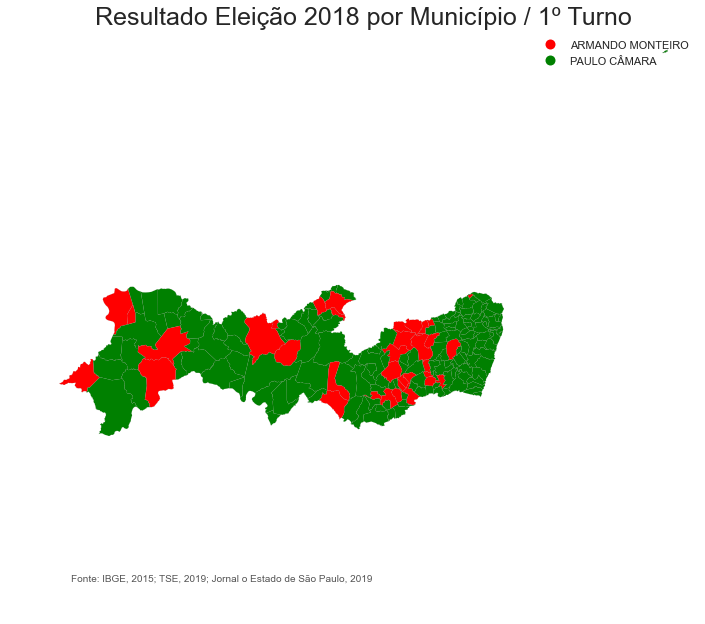

In [118]:
# Vamos desenhar o mapa

# Criar a referência para o código de cor (False/0 = red, True/1 = green)
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green'])

# Desenhando o mapa
fig, ax = plt.subplots(1, figsize=(12, 12))

ax = dados_final.plot(column='NM_URNA_CANDIDATO', cmap=cmap, legend=True, linewidth=0.1, ax=ax,
                      edgecolor='grey')

# Escondendo o eixos
ax.set_axis_off()

# Colocando um título
ax.set_title('Resultado Eleição 2018 por Município / 1º Turno', fontdict={'fontsize': '25', 'fontweight': '3'})

# Criando uma nota do rodapé
ax.annotate('Fonte: IBGE, 2015; TSE, 2019; Jornal o Estado de São Paulo, 2019',
    xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left',
    verticalalignment='top', fontsize=10, color='#555555')

# Alterando a legenda
leg = ax.get_legend()
leg.get_texts()[0].set_text('ARMANDO MONTEIRO')
leg.get_texts()[1].set_text('PAULO CÂMARA')

plt.show()


In [123]:
# Salvando os dados.
dados_final.to_csv('Eleições Governador Pernambuco de 2018 por Município .csv')